# Jina Embeddings v3

Extra datacleaning

### Imports

In [1]:
# # Install necessary libraries if not already installed
# !pip install --upgrade torch torchvision
# !pip install flash-attn --no-build-isolation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from pathlib import Path
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from bs4 import BeautifulSoup
import random
import umap
import re
import pandas as pd
import matplotlib.pyplot as plt
import re


## Step 2: Data cleaning 



#### Load data

In [2]:
df_total_NOS= pd.read_csv(r"E:\Nieuw dataset\Dutch news articles 2015-2025 NOS.nl\articles_cleaned.csv")
display(df_total_NOS)

published_time                                              title  \
0          2015/01/01                            Euro nu ook in Litouwen   
1          2015/01/01  Start 2015 vol vreugde maar ook met gewonden e...   
2          2015/01/01     Letland nieuwe voorzitter van de Europese Unie   
3          2015/01/01              Noord-Korea wil praten met Zuid-Korea   
4          2015/01/01                 Feest in Londen, Parijs en Berlijn   
...               ...                                                ...   
291470     2025/01/30  Nipte zege op Besiktas helpt FC Twente naar tu...   
291471     2025/01/30  Radioprogramma 'Jan-Willem Start Op!' wint Gou...   
291472     2025/01/30  Zweedse premier: ander land mogelijk betrokken...   
291473     2025/01/30  Kroatië dwingt topland Frankrijk tot fouten en...   
291474     2025/01/30  FC Twente en Ajax mogelijk tegen Belgen in tus...   

                                              description  \
0       Vanaf vandaag betalen ze in Litouwen met de eu...   
1       Nederland is met oliebollen en vuurwerk het ni...   
2       Vanaf vandaag neemt Letland het stokje over va...   
3       De Noord-Koreaanse leider Kim Jong-un zei in z...   
4       In Londen en Berlijn waren muziekfestivals. Pa...   
...                                                   ...   
291470  FC Twente, dat sowieso een zege nodig had, wee...   
291471  De ochtendshow op Radio 2 kreeg de prijs voor ...   
291472  Er zijn tot nu toe vijf mensen opgepakt. De po...   
291473  Het werd 31 tegen 28 in de halve finale tegen ...   
291474  Vrijdag om 13.00 uur volgt de loting voor de t...   

                                                  content  \
0       Euro nu ook in Litouwen In Litouwen wordt vana...   
1       Start 2015 vol vreugde maar ook met gewonden e...   
2       Letland nieuwe voorzitter van de Europese Unie...   
3       Noord-Korea wil praten met Zuid-Korea De Noord...   
4       Feest in Londen, Parijs en Berlijn In Europa i...   
...                                                   ...   
291470  Nipte zege op Besiktas helpt FC Twente naar tu...   
291471  Radioprogramma 'Jan-Willem Start Op!' wint Gou...   
291472  Zweedse premier: ander land mogelijk betrokken...   
291473  Kroatië dwingt topland Frankrijk tot fouten en...   
291474  FC Twente en Ajax mogelijk tegen Belgen in tus...   

                                                      url channel  
0       https://nos.nl/artikel/2011341-euro-nu-ook-in-...     nos  
1       https://nos.nl/artikel/2011343-start-2015-vol-...     nos  
2       https://nos.nl/artikel/2011346-letland-nieuwe-...     nos  
3       https://nos.nl/artikel/2011348-noord-korea-wil...     nos  
4       https://nos.nl/artikel/2011351-feest-in-londen...     nos  
...                                                   ...     ...  
291470                           https://nos.nl/l/2553906     nos  
291471                           https://nos.nl/l/2553907     nos  
291472                           https://nos.nl/l/2553908     nos  
291473                           https://nos.nl/l/2553909     nos  
291474                           https://nos.nl/l/2553911     nos  

[291475 rows x 6 columns]

Woorden en carracters tellen voor en na de cleaning

voor embedding cleaning 

In [ ]:
df_total_NOS['combined_text'] = df_total_NOS['title'].fillna('')

In [3]:
# Combine 'title', 'description', and 'content' into 'combined_text'
#df_total_NOS['combined_text'] = df_total_NOS['title'].fillna('') + ". " + df_total_NOS['description'].fillna('') + ". " + df_total_NOS['content'].fillna('')

df_total_NOS['combined_text'] = df_total_NOS['title'].fillna('')
def calculate_csv_stats(df_total_NOS):
    """
    Calculate and print the total number of characters in 'combined_text' 
    and the size of the DataFrame in megabytes.

    Args:
        df (pd.DataFrame): The DataFrame containing the 'combined_text' column.

    Returns:
        tuple: Total characters and CSV size in megabytes.
    """
    # Bereken het totale aantal karakters in 'combined_text'
    total_characters = df_total_NOS['combined_text'].str.len().sum()
    print(f"Totaal aantal karakters in 'combined_text': {total_characters}")

    # Bereken de grootte van de CSV in megabytes
    csv_size_mb = df_total_NOS.memory_usage(deep=True).sum() / (1024 * 1024)
    print(f"Grootte van de CSV: {csv_size_mb:.2f} MB")
    
    return total_characters, csv_size_mb

# Roep de functie aan
total_characters, csv_size_mb = calculate_csv_stats(df_total_NOS)

Totaal aantal karakters in 'combined_text': 17017054
Grootte van de CSV: 1200.31 MB


Text cleaning

* evt nog stop woorden verwijderen zoals ik etc 

In [4]:


# Define the text cleaning function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[\/\-']", ' ', text)
    text = re.sub(r"&", ' and ', text)
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text)
    text = re.sub(r"\s+", ' ', text).strip()
    return text

# Apply the cleaning function to the 'combined_text' column
df_total_NOS['combined_text'] = df_total_NOS['combined_text'].apply(clean_text)

total_characters, csv_size_mb = calculate_csv_stats(df_total_NOS)

Totaal aantal karakters in 'combined_text': 16706363
Grootte van de CSV: 1199.00 MB


In [5]:
!pip install nltk

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

dutch_stopwords = stopwords.words('dutch')




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dylan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


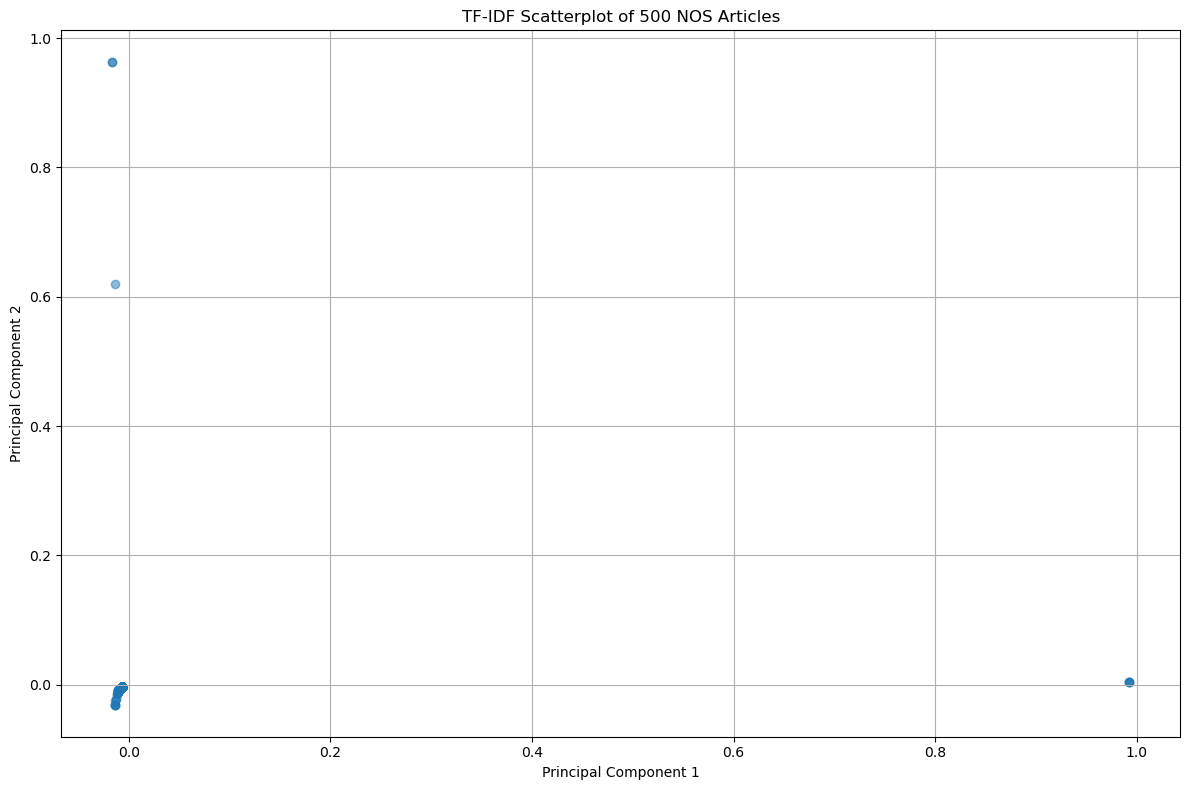

                                                    title  \
120927              Bliksem slaat in bij Tilburgse Djenti   
255528  Voetbaldrama in Dortmund: Borussia verspeelt t...   
289040  Titelverdediger Barcelona klopt Man City en is...   
252289  Vanavond op tv: Nulurencontracten verboden • T...   
66436          Waar zijn de Aziaten op de Nederlandse tv?   
1744                               Choukoud wint NK cross   
172002    Politie waarschuwt voor nepbericht over aanslag   
216015  Italië pakt 70-jarige topvrouw van Napolitaans...   
183533  Sir Keir Starmer moet 'working class' terugwin...   
127530             John de Mol begint eigen nieuwsrubriek   

                                                      url  \
120927  https://nos.nl/artikel/2212858-bliksem-slaat-i...   
255528  https://nos.nl/artikel/2476687-voetbaldrama-in...   
289040                           https://nos.nl/l/2548847   
252289  https://nos.nl/nieuwsuur/artikel/2470004-vanav...   
66436   https://nos.nl/

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your NOS dataset

df_total_NOS['combined_text'] = df_total_NOS['combined_text'].fillna("")

# Sample for plotting (to reduce computation)
df_sample = df_total_NOS.sample(n=500, random_state=42)

# TF-IDF
vectorizer = TfidfVectorizer(
    stop_words=dutch_stopwords,      # real Dutch stopword removal
    ngram_range=(2, 3),      # use 2–3 word phrases
    max_features=500
)
X = vectorizer.fit_transform(df_sample['combined_text'])

# PCA to reduce dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Top 3 keywords per article
feature_names = vectorizer.get_feature_names_out()
top_keywords = []
for row in X:
    indices = row.toarray().argsort()[0][-3:][::-1]
    keywords = [feature_names[i] for i in indices]
    top_keywords.append(", ".join(keywords))

df_sample['keywords'] = top_keywords

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
plt.title("TF-IDF Scatterplot of 500 NOS Articles")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Preview article titles and keywords
print(df_sample[['title', 'url', 'keywords']].head(10))


oke dit heeft niet veel verschil gemaakt, wil nu keyword search doen voordat ik ga embedden

> Import en keyword-definitie

In [7]:


# Definieer de lijst van EV-gerelateerde keywords
ev_keywords = [
    "elektrische auto", "elektrische voertuigen", "elektrisch rijden", "stekkerauto", "emissievrij",
    "zero emission", "elektrisch vervoer", "battery electric vehicle", "BEV", "EV", "EV-markt",
    "laadpaal", "laadinfrastructuur", "laadstation", "snelladen", "laadtijd",
    "laadnetwerk", "opladen", "elektriciteitsnet", "netcongestie",
    "batterij", "accu", "actieradius", "solid state batterij", "energieopslag", "accutechnologie",
    "Tesla", "BYD", "Volkswagen ID", "Renault Zoe", "Hyundai Ioniq", "Kia EV",
    "Nissan Leaf", "Polestar", "BMW i", "Ford Mustang Mach-E", "Audi e-tron",
    "subsidie elektrische auto", "aanschafsubsidie", "bijtelling",
    "fiscale stimulering", "milieu-investeringsaftrek", "overheidsbeleid", "klimaatmaatregelen",
    "duurzame mobiliteit", "klimaatbeleid", "CO2-uitstoot", "groene transitie",
    "verduurzaming vervoer", "energietransitie", "schoner verkeer",
    "tweedehands elektrische auto", "EV import", "EV export", "restwaarde EV",
    "autoverkoop EV", "EV occasion", "elektrisch leasen", "Subsidieregeling Elektrische Personenauto's Particulieren"
]

# Maak regex patroon: \b staat voor woordgrenzen
ev_pattern = r'\b(?:' + '|'.join(re.escape(kw) for kw in ev_keywords) + r')\b'


 >Filteren van EV-artikelen

In [8]:
# Filter de DataFrame met behulp van regex (één of meer keywords)
ev_mask = df_total_NOS['combined_text'].str.contains(ev_pattern, case=False, na=False, regex=True)
df_ev = df_total_NOS[ev_mask].copy()


>vanaf hier overgegaan van df_total_NOS naar df_ev

In [9]:
# Basisinformatie over EV-artikelen
print(f"Totaal aantal karakters: {df_ev['combined_text'].str.len().sum()}")
print(f"Grootte DataFrame: {df_ev.memory_usage(deep=True).sum() / (1024 * 1024):.2f} MB")

# Artikelen per kanaal
print("\nAantal artikelen per kanaal:")
print(df_ev['channel'].value_counts())

# Artikelen per maand
df_ev['year_month'] = pd.to_datetime(df_ev['published_time']).dt.to_period('M')
articles_per_month = df_ev['year_month'].value_counts().sort_index()
print("\nAantal artikelen per maand:")
print(articles_per_month)

# Ontbrekende maanden
all_months = pd.period_range(start=articles_per_month.index.min(), end=articles_per_month.index.max(), freq='M')
missing_months = all_months.difference(articles_per_month.index)
print("\nOntbrekende maanden (geen artikelen):")
print(missing_months)


display(df_ev)


Totaal aantal karakters: 25398
Grootte DataFrame: 1.37 MB

Aantal artikelen per kanaal:
channel
nos          361
nieuwsuur     45
Name: count, dtype: int64

Aantal artikelen per maand:
year_month
2015-02     1
2015-03     2
2015-04     4
2015-05     3
2015-06     3
           ..
2024-09     2
2024-10    10
2024-11     4
2024-12     1
2025-01     7
Freq: M, Name: count, Length: 112, dtype: int64

Ontbrekende maanden (geen artikelen):
PeriodIndex(['2015-07', '2015-09', '2020-11', '2022-07', '2022-08', '2022-09',
             '2022-12', '2024-07'],
            dtype='period[M]')


published_time                                              title  \
5526       2015/02/18  Nederland en Californië investeren in elektris...   
7795       2015/03/08         Rapport MH370: accu positiebepaler was oud   
8631       2015/03/14    Je mobiel opladen aan een shirt met zonnecellen   
11315      2015/04/07  Nieuw type batterij laadt in 1 minuut op en ga...   
12091      2015/04/14  Urgenda wil via rechter ander klimaatbeleid af...   
...               ...                                                ...   
289774     2025/01/02  Man in ontplofte Tesla bij Trump Hotel was Ame...   
289847     2025/01/04  FBI: man in ontplofte Tesla bij Trump Hotel ha...   
290185     2025/01/10  Pensioenfonds ABP stapt uit Tesla, beloning Mu...   
290215     2025/01/11  Brandveiligheid parkeergarages in geding door ...   
290704     2025/01/18  Ov-bussen moeten in 2030 uitstootvrij zijn, ma...   

                                              description  \
5526    Minister Ploumen heeft in Amerika afspraken ge...   
7795    Het gedetailleerde rapport werpt geen nieuw li...   
8631    Vorig jaar presenteerde modeontwerpster Paulin...   
11315   Het klinkt te mooi om waar te zijn, maar onder...   
12091   De klimaatorganisatie noemt de rechtszaak unie...   
...                                                   ...   
289774  Hij zou gediend hebben in een speciale eenheid...   
289847  De FBI gaat er niet van uit dat de de explosie...   
290185  ABP, één van grootste pensioenfondsen ter were...   
290215  Branden waarbij elektrische auto's betrokken z...   
290704  In 2030 moeten alle bussen in het openbaar ver...   

                                                  content  \
5526    Nederland en Californië investeren in elektris...   
7795    Rapport MH370: accu positiebepaler was oud Een...   
8631    Je mobiel opladen aan een shirt met zonnecelle...   
11315   Nieuw type batterij laadt in 1 minuut op en ga...   
12091   Urgenda wil via rechter ander klimaatbeleid af...   
...                                                   ...   
289774  Man in ontplofte Tesla bij Trump Hotel was Ame...   
289847  FBI: man in ontplofte Tesla bij Trump Hotel ha...   
290185  Pensioenfonds ABP stapt uit Tesla, beloning Mu...   
290215  Brandveiligheid parkeergarages in geding door ...   
290704  Ov-bussen moeten in 2030 uitstootvrij zijn, ma...   

                                                      url channel  \
5526    https://nos.nl/artikel/2019928-nederland-en-ca...     nos   
7795    https://nos.nl/artikel/2023441-rapport-mh370-a...     nos   
8631    https://nos.nl/artikel/2024768-je-mobiel-oplad...     nos   
11315   https://nos.nl/artikel/2028966-nieuw-type-batt...     nos   
12091   https://nos.nl/artikel/2030136-urgenda-wil-via...     nos   
...                                                   ...     ...   
289774                           https://nos.nl/l/2550385     nos   
289847                           https://nos.nl/l/2550517     nos   
290185                           https://nos.nl/l/2551208     nos   
290215                           https://nos.nl/l/2551284     nos   
290704                           https://nos.nl/l/2552279     nos   

                                            combined_text year_month  
5526    nederland en californi investeren in elektrisc...    2015-02  
7795            rapport mh370 accu positiebepaler was oud    2015-03  
8631      je mobiel opladen aan een shirt met zonnecellen    2015-03  
11315   nieuw type batterij laadt in 1 minuut op en ga...    2015-04  
12091   urgenda wil via rechter ander klimaatbeleid af...    2015-04  
...                                                   ...        ...  
289774  man in ontplofte tesla bij trump hotel was ame...    2025-01  
289847  fbi man in ontplofte tesla bij trump hotel had...    2025-01  
290185  pensioenfonds abp stapt uit tesla beloning mus...    2025-01  
290215  brandveiligheid parkeergarages in geding door ...    2025-01  
290704  ov bussen 

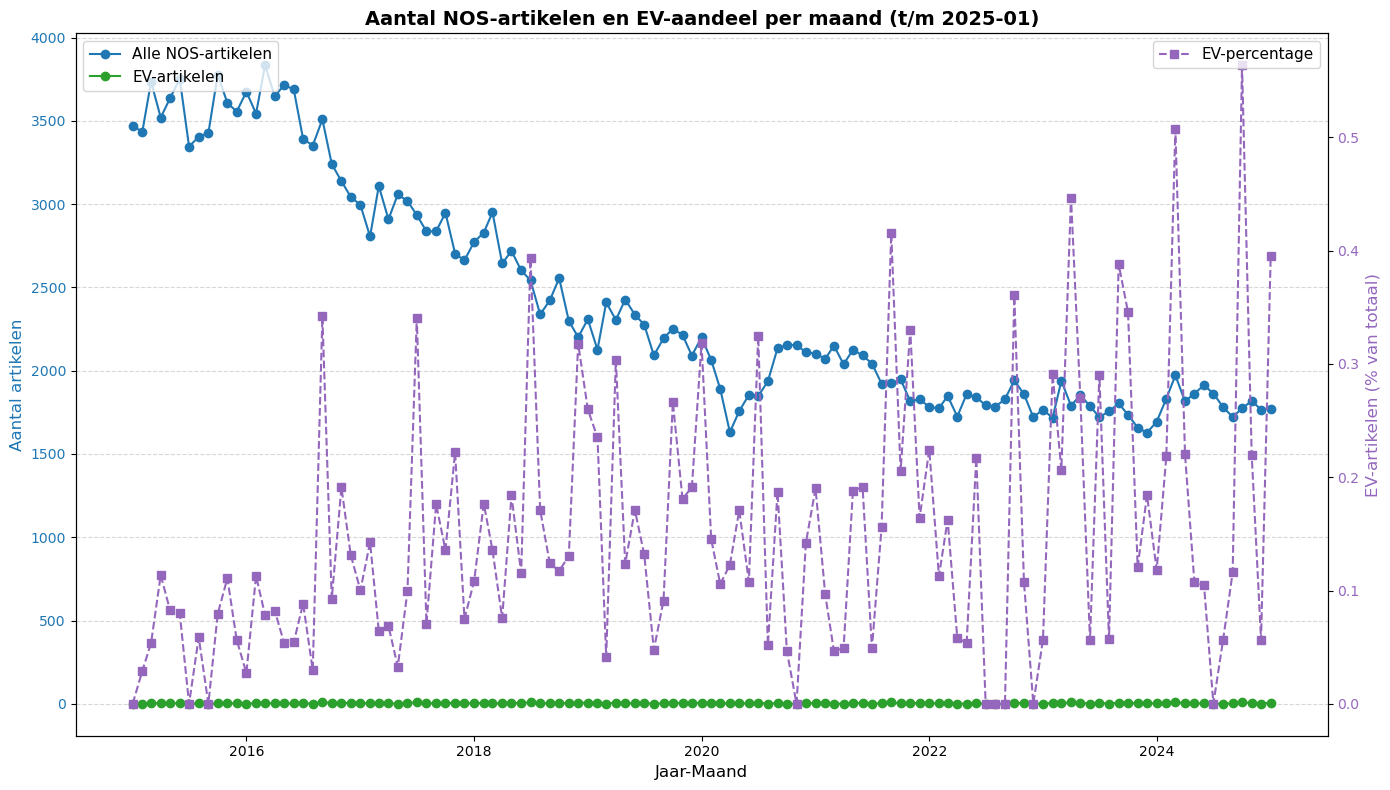

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Zorg dat published_time in datetime staat
df_total_NOS['published_time'] = pd.to_datetime(df_total_NOS['published_time'], errors='coerce')
df_ev['published_time'] = pd.to_datetime(df_ev['published_time'], errors='coerce')

# Voeg 'year_month' toe
df_total_NOS['year_month'] = df_total_NOS['published_time'].dt.to_period('M')
df_ev['year_month'] = df_ev['published_time'].dt.to_period('M')

# Filter tot en met 2025-01
df_total_NOS = df_total_NOS[df_total_NOS['year_month'] <= pd.Period('2025-01', freq='M')]
df_ev = df_ev[df_ev['year_month'] <= pd.Period('2025-01', freq='M')]

# Tellingen per maand
total_articles_per_month = df_total_NOS['year_month'].value_counts().sort_index()
ev_articles_per_month = df_ev['year_month'].value_counts().sort_index()

# Synchroniseer maanden
all_months = pd.period_range(start=min(total_articles_per_month.index.min(), ev_articles_per_month.index.min()),
                             end='2025-01', freq='M')
total_articles_per_month = total_articles_per_month.reindex(all_months, fill_value=0)
ev_articles_per_month = ev_articles_per_month.reindex(all_months, fill_value=0)

# Bereken percentage EV
ev_percentage_per_month = (ev_articles_per_month / total_articles_per_month.replace(0, np.nan)) * 100

# Zet X-as om naar timestamps
x_vals = all_months.to_timestamp()

# Plotten
fig, ax1 = plt.subplots(figsize=(14, 8))

# Linker Y-as: aantal artikelen
color1 = 'tab:blue'
ax1.set_xlabel("Jaar-Maand", fontsize=12)
ax1.set_ylabel("Aantal artikelen", color=color1, fontsize=12)
ax1.plot(x_vals, total_articles_per_month, label="Alle NOS-artikelen", color=color1, marker='o')
ax1.plot(x_vals, ev_articles_per_month, label="EV-artikelen", color='tab:green', marker='o')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc="upper left", fontsize=11)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Rechter Y-as: percentage EV
ax2 = ax1.twinx()
color2 = 'tab:purple'
ax2.set_ylabel("EV-artikelen (% van totaal)", color=color2, fontsize=12)
ax2.plot(x_vals, ev_percentage_per_month, color=color2, marker='s', linestyle='--', label="EV-percentage")
ax2.tick_params(axis='y', labelcolor=color2)
ax2.legend(loc="upper right", fontsize=11)

# Titel & X-as
plt.title("Aantal NOS-artikelen en EV-aandeel per maand (t/m 2025-01)", fontsize=14, fontweight="bold")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()




In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def prepare_monthly_counts(df, date_col='published_time', end_period='2025-01'):
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['year_month'] = df[date_col].dt.to_period('M')
    return df[df['year_month'] <= pd.Period(end_period, freq='M')]

def plot_monthly_stats(df_total, df_ev):
    # Tel per maand
    total = df_total['year_month'].value_counts().sort_index()
    ev = df_ev['year_month'].value_counts().sort_index()

    # Synchroniseer maanden
    all_months = pd.period_range(start=min(total.index.min(), ev.index.min()), end='2025-01', freq='M')
    total = total.reindex(all_months, fill_value=0)
    ev = ev.reindex(all_months, fill_value=0)
    ev_pct = (ev / total.replace(0, np.nan)) * 100
    x = all_months.to_timestamp()

    # Plot met dubbele Y-as
    fig, ax1 = plt.subplots(figsize=(14, 8))
    ax1.set_xlabel("Jaar-Maand", fontsize=12)
    ax1.set_ylabel("Aantal artikelen", color='tab:blue', fontsize=12)
    ax1.plot(x, total, label="Alle NOS-artikelen", color='tab:blue', marker='o')
    ax1.plot(x, ev, label="EV-artikelen", color='tab:green', marker='o')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc="upper left", fontsize=11)
    ax1.grid(axis='y', linestyle='--', alpha=0.5)

    ax2 = ax1.twinx()
    ax2.set_ylabel("EV-artikelen (% van totaal)", color='tab:purple', fontsize=12)
    ax2.plot(x, ev_pct, color='tab:purple', marker='s', linestyle='--', label="EV-percentage")
    ax2.tick_params(axis='y', labelcolor='tab:purple')
    ax2.legend(loc="upper right", fontsize=11)

    plt.title("Aantal NOS-artikelen en EV-aandeel per maand (t/m 2025-01)", fontsize=14, fontweight="bold")
    plt.xticks(rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()

def plot_ev_trend(df_ev):
    counts = df_ev['year_month'].value_counts().sort_index()
    x = counts.index.to_timestamp()
    y = counts.values
    x_nums = np.arange(len(x))
    trend = np.poly1d(np.polyfit(x_nums, y, 1))

    plt.figure(figsize=(14, 8))
    plt.plot(x, y, label="EV-artikelen per maand", marker='o', color='green')
    plt.plot(x, trend(x_nums), label="Lineaire trend", linestyle='--', color='black')
    plt.title("Aantal EV-gerelateerde artikelen per maand (t/m 2025-01)", fontsize=14, fontweight="bold")
    plt.xlabel("Jaar-Maand", fontsize=12)
    plt.ylabel("Aantal artikelen", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# === Uitvoeren ===
df_total_NOS = prepare_monthly_counts(df_total_NOS)
df_ev = prepare_monthly_counts(df_ev)







twee y asses plotten 

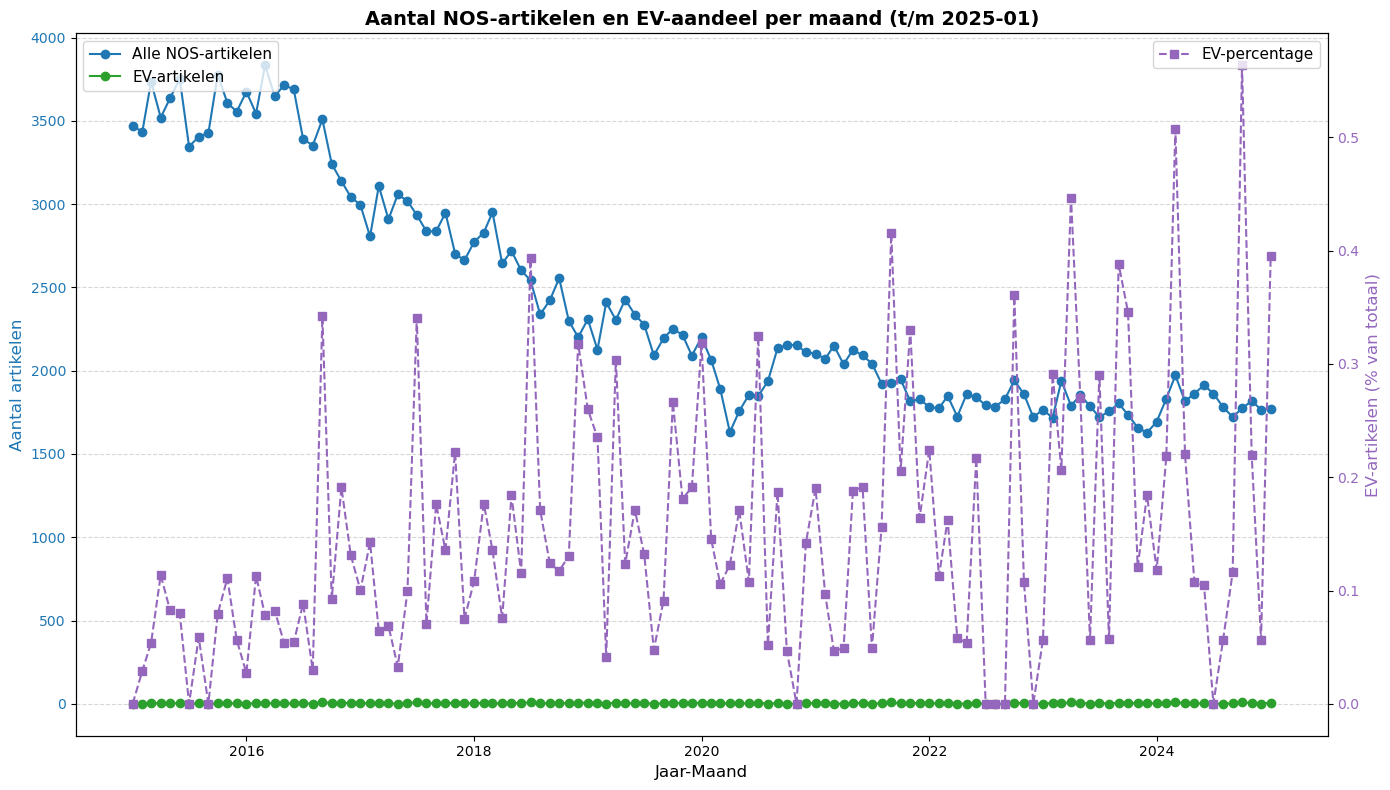

In [12]:
plot_monthly_stats(df_total_NOS, df_ev)

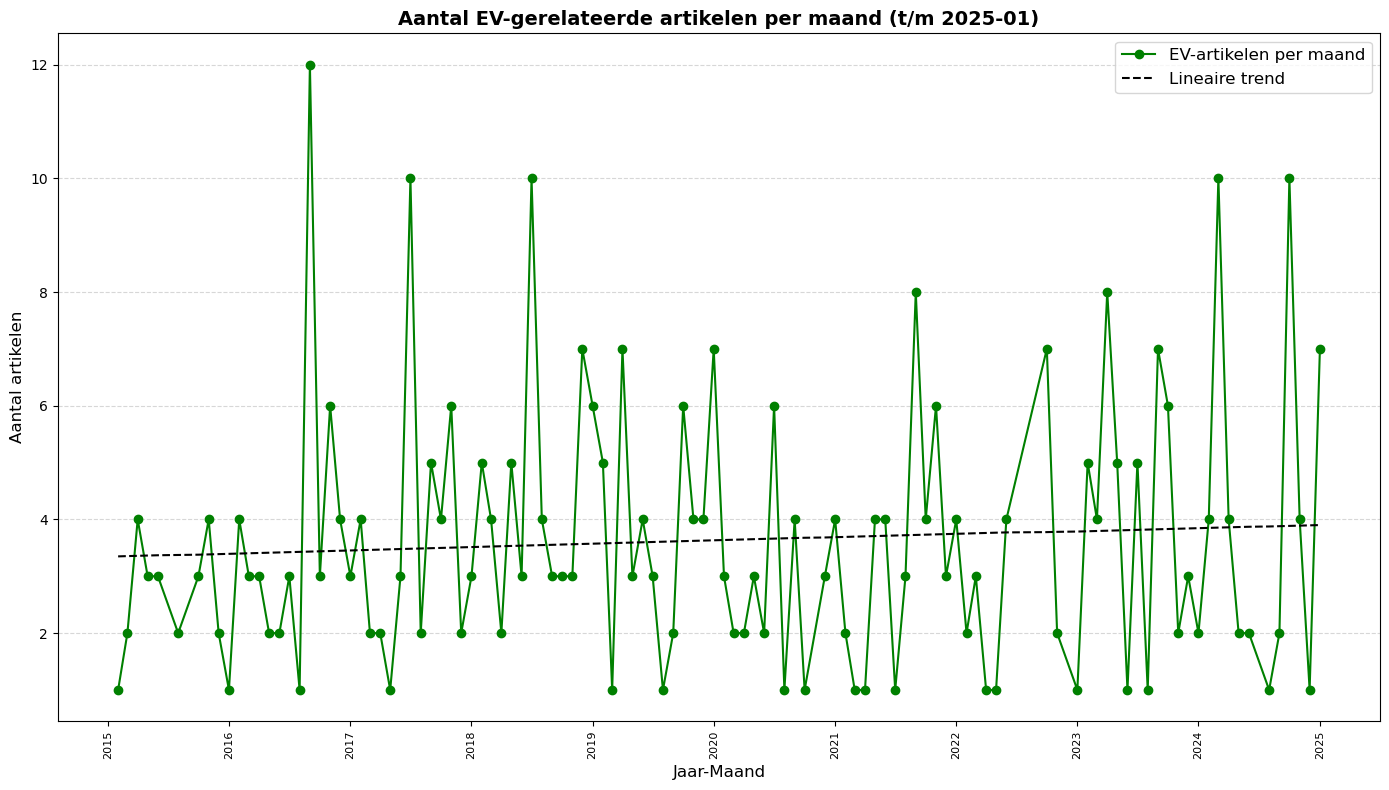

In [13]:
plot_ev_trend(df_ev)

In [41]:
output_path = r"E:\Nieuw dataset\EV_related_articles1.csv"
df_ev.to_csv(output_path, index=False, encoding='utf-8')
print(f"EV-related articles exported to: {output_path}")


EV-related articles exported to: E:\Nieuw dataset\EV_related_articles1.csv


In [14]:

# Display 10 random titles and URLs from the EV-related articles DataFrame
random_articles = df_ev.sample(20, random_state=42)[['title', 'url']]

# Print the titles, URLs, and matching keywords
for index, row in random_articles.iterrows():
    title = row['title']
    url = row['url']
    # Access 'combined_text' from the original df_ev DataFrame using the index
    full_text = df_ev.loc[index, 'combined_text']
    
    matching_keywords = [kw for kw in ev_keywords if kw.lower() in full_text.lower()]
    
    print(f"Title: {title}")
    print(f"URL: {url}")
    print(f"Matching Keywords: {', '.join(matching_keywords) if matching_keywords else 'None'}\n")

random_articles = df_ev.sample(10, random_state=42)[['title', 'url']]

# Print the titles, URLs, and matching keywords
for index, row in random_articles.iterrows():
    title = row['title']
    url = row['url']
    matching_keywords = [keyword for keyword in ev_keywords if keyword.lower() in title.lower()]
    
    print(f"Title: {title}")
    print(f"URL: {url}")
    print(f"Matching Keywords: {', '.join(matching_keywords) if matching_keywords else 'None'}\n")

Title: Nieuwe hobby voor Tesla-baas: tunnels graven
URL: https://nos.nl/artikel/2154843-nieuwe-hobby-voor-tesla-baas-tunnels-graven
Matching Keywords: Tesla

Title: Bomenkap voor Tesla-fabriek stilgelegd, waarschuwing voor 'catastrofale' gevolgen
URL: https://nos.nl/artikel/2323566-bomenkap-voor-tesla-fabriek-stilgelegd-waarschuwing-voor-catastrofale-gevolgen
Matching Keywords: EV, Tesla

Title: VDL Nedcar gaat elektrische auto's bouwen voor Canoo
URL: https://nos.nl/artikel/2385490-vdl-nedcar-gaat-elektrische-auto-s-bouwen-voor-canoo
Matching Keywords: elektrische auto

Title: Voorbij de Tesla-hype: kan de automaker aan de verwachtingen voldoen?
URL: https://nos.nl/artikel/2097118-voorbij-de-tesla-hype-kan-de-automaker-aan-de-verwachtingen-voldoen
Matching Keywords: Tesla

Title: Verliezen Tesla lopen verder op
URL: https://nos.nl/artikel/2123041-verliezen-tesla-lopen-verder-op
Matching Keywords: Tesla

Title: Armste Nederlanders draaien op voor het klimaatbeleid
URL: https://nos.nl/n

In [15]:
# Filter articles in df_ev that do not contain any of the keywords in ev_keywords
def find_articles_without_keywords(df_ev, ev_keywords):
    """
    Find articles in df_ev that do not contain any of the specified keywords.

    Args:
        df_ev (pd.DataFrame): DataFrame containing articles.
        ev_keywords (list): List of keywords to check.

    Returns:
        pd.DataFrame: DataFrame of articles without matching keywords.
    """
    no_match_mask = ~df_ev['combined_text'].str.contains(
        '|'.join(map(re.escape, ev_keywords)), case=False, na=False
    )
    return df_ev[no_match_mask]

# Call the function
articles_without_keywords = find_articles_without_keywords(df_ev, ev_keywords)

# Print the count and display the articles
print(f"Number of articles without matching keywords: {len(articles_without_keywords)}")
display(articles_without_keywords[['title', 'url']])



Number of articles without matching keywords: 0


Empty DataFrame
Columns: [title, url]
Index: []

## Google Collab code 

In [ ]:

# import pandas as pd

# #Load the filtered EV-related articles CSV into a new DataFrame
# df_ev = pd.read_csv("/content/EV_related_articles.csv") 


# #Preview van de kolommen
# print(df_ev.columns) # Changed df to df_ev
# df_ev.head() # Changed df to df_ev


# from sentence_transformers import SentenceTransformer

# #Laad het model
# model = SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)



# #Combineer de kolommen ZONDER af te kappen op 512 tekens
# teksten = (
#     df_ev['title'].fillna('') + ". " +
#     df_ev['description'].fillna('') + ". " +
#     df_ev['content'].fillna('')
# ).astype(str).tolist()

# #Genereer de embeddings (mogelijk zwaarder/slomer)
# embeddings = model.encode(
#     teksten,
#     task="separation",
#     prompt_name="separation",
#     show_progress_bar=True,
#     batch_size=2  # Lager zetten i.v.m. lange input
# )



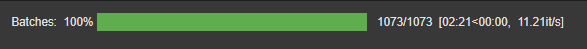

In [ ]:
# import numpy as np


# np.save("jina_embeddings.npy", embeddings)
# from google.colab import files
# files.download("jina_embeddings.npy")


In [ ]:
# n_clusters = 10
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# df_sample['cluster'] = kmeans.fit_predict(embeddings)
# df_sample[['content', 'cluster']].head(10)

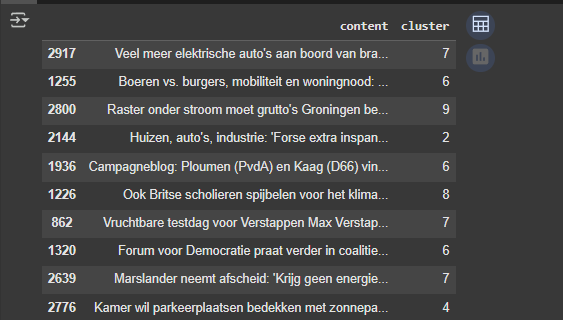

In [ ]:

# # Reload the SentenceTransformer model
# model = SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)

# #  1. Meerdere zoekzinnen definiëren (specifieker & breder)
# zoekzinnen = [
#     "Artikel over elektrische auto's of laadpalen.",
#     "Nieuws over accutechnologie, stekkervoertuigen of EV-beleid.",
#     "EV, elektrische auto, laadpaal, Tesla, batterij — dit artikel gaat hierover."
# ]

# #  2. Encode alle zoekzinnen
# query_embeddings = model.encode( # Now using the correct 'model' 
#     zoekzinnen,
#     prompt_name="retrieval.query",
#     normalize_embeddings=True
# )

# #  3. Normaliseer artikel-embeddings
# artikel_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# #  4. Bereken cosine similarity tussen alle queries en artikelen
# scores_matrix = cosine_similarity(query_embeddings, artikel_embeddings)

# #  5. Neem de hoogste score per artikel
# max_scores = scores_matrix.max(axis=0)

# #  6. Voeg toe aan DataFrame
# df_sample['ev_score'] = max_scores
# df_sample['is_ev_semantisch'] = df_sample['ev_score'] > 0.5  # ↩ experimenteer met deze drempel

# #  7. (Optioneel) ook keyword-based fallback
# df_sample['is_ev_keyword'] = df_sample['content'].str.contains(
#     "elektrische auto|laadpaal|accu|EV|Tesla|opladen|emissievrij", case=False, na=False
# )

# #  8. Combineer
# df_sample['is_ev_final'] = df_sample['is_ev_semantisch'] | df_sample['is_ev_keyword']

# # 9. Resultaat inspecteren
# df_sample[['content', 'ev_score', 'is_ev_semantisch', 'is_ev_keyword', 'is_ev_final']].sort_values(by='ev_score', ascending=False).head(10)


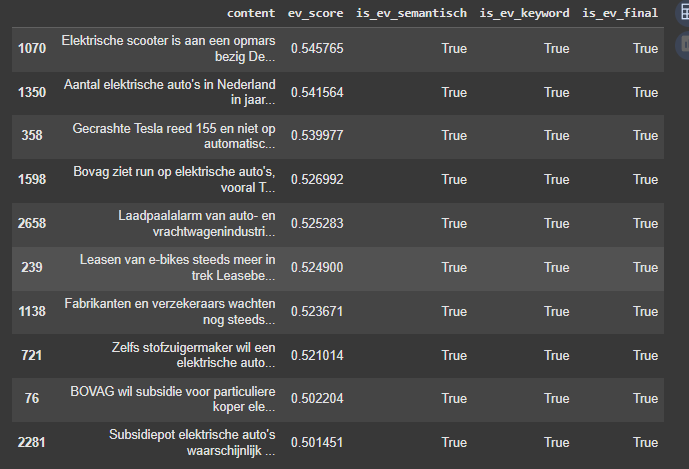

In [277]:
from matplotlib import pyplot as plt
df_sample['ev_score'].plot(kind='hist', bins=20, title='ev_score') # Changed _df_4 to df_sample
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'df_sample' is not defined

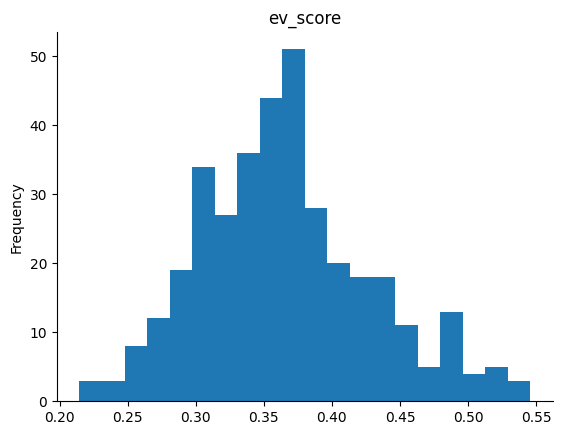

1. Imports

In [ ]:
import numpy as np
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


>Load data and embeddings

In [ ]:
embeddings = np.load(r"E:\Nieuw dataset\ev_embeddings.npy")
df_articles = pd.read_csv(r"E:\Nieuw dataset\EV_related_articles1.csv")

>Generate query embedding and calculate similarity

In [16]:
electric_cars_query = (
    "Nieuws over elektrische auto's",
    "Artikelen over laadpalen, elektrisch rijden, en subsidies voor elektrische voertuigen.",
    "Informatie over elektrische voertuigen, laadstations, en duurzame mobiliteit.",
    "Zoek naar nieuws over Tesla, en emissievrij vervoer.",
    "Elektrische auto's, accutechnologie, en energietransitie in het nieuws."
)

electric_cars_query_embedding = model.encode(
    electric_cars_query, task='retrieval.query'
).mean(axis=0)

electric_cars_similarities = cosine_similarity(
    [electric_cars_query_embedding], embeddings
)[0]


NameError: name 'model' is not defined

>Step 3: UMAP visualization ==

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\dylan\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


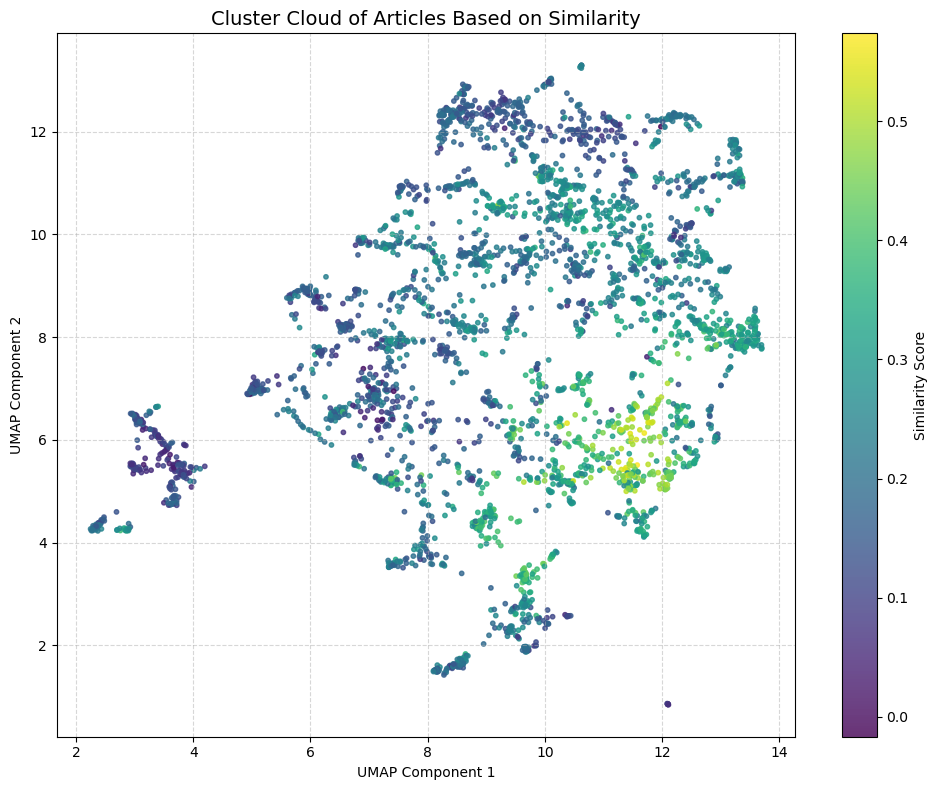

In [ ]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
embedding_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    embedding_2d[:, 0],
    embedding_2d[:, 1],
    c=electric_cars_similarities,
    cmap="viridis",
    s=10,
    alpha=0.8
)
plt.colorbar(scatter, label="Similarity Score")
plt.title("Cluster Cloud of Articles Based on Similarity", fontsize=14)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

> Step 4: Histogram of similarity scores 

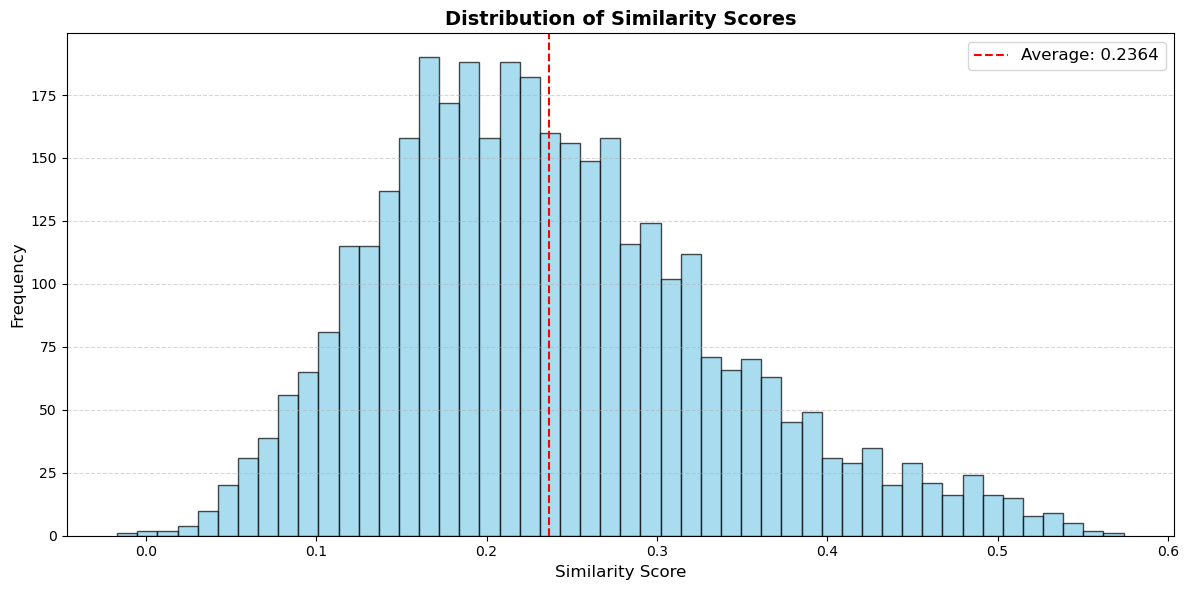

Average Similarity Score: 0.2364


In [ ]:

# Calculate the average similarity score
average_similarity = electric_cars_similarities.mean()

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(electric_cars_similarities, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(average_similarity, color='red', linestyle='--', linewidth=1.5, label=f"Average: {average_similarity:.4f}")
plt.title("Distribution of Similarity Scores", fontsize=14, fontweight="bold")
plt.xlabel("Similarity Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# Print the average similarity score
print(f"Average Similarity Score: {average_similarity:.4f}")



In [ ]:
# Only if not already added:
df_articles = df_articles.iloc[:len(electric_cars_similarities)].copy()
df_articles['similarity'] = electric_cars_similarities
df_articles['ev_related'] = df_articles['similarity']


In [ ]:

# Print top 10 most similar
print("Top 10 articles about electric cars:")
for idx, row in df_articles.head(10).iterrows():
    print(f"\nArticle {idx} similarity: {row['similarity']:.4f}")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Content (snippet): {row['content'][:200]}...")
    print(f"URL: {row['url']}")
    print(f"Related Keywords: {', '.join([kw for kw in ev_keywords if kw.lower() in row['combined_text'].lower()])}")


Top 10 articles about electric cars:

Article 0 similarity: 0.2949
Title: Verkoop nieuwe auto's stevent af op laagterecord
Description: Nederlanders kochten in 2014 opnieuw minder auto's. En die trend zet door, is een van de thema's in de economieserie Ganzenbord.
Content (snippet): Verkoop nieuwe auto's stevent af op laagterecord 'Ganzenbord' op NPO Radio 1 is een serie van de NOS. Aan de hand van het ouderwetse Ganzenbordspel blikt de economieredactie terug op de economische ho...
URL: https://nos.nl/artikel/2011357-verkoop-nieuwe-auto-s-stevent-af-op-laagterecord
Related Keywords: elektrische auto, EV, bijtelling

Article 1 similarity: 0.2051
Title: De stroom 02/01
Description: De stroom van NOS op 3
Content (snippet): De stroom 02/01 'Vermiste Amerikaan dood gevonden in Mexico' De 25-jarige Amerikaan Hari Simran Singh Khalsa is dood gevonden in de bergen van Mexico, zegt een woordvoerder van de zoekactie. de man we...
URL: https://nos.nl/op3/liveblog/2011449-de-stroom-02-01
Related

In [ ]:
average_similarity_top_10 = top_10_articles['similarity'].mean()
# Filter articles with similarity score lower than 0.2364
average_similarity_top_10 = df_articles[df_articles['similarity'] >= 0.2364]

# Print the details of the filtered articles
print(f"Articles with Similarity higher than  0.2364 (Total: {len(average_similarity_top_10)}):")
top_10_articles = df_articles.head(10)
average_similarity_top_10 = top_10_articles['similarity'].mean()
print(f"Average Similarity Score of Top 10 Articles: {average_similarity_top_10:.4f}")
for idx, row in df_articles.head(10).iterrows():
    print(f"\nArticle {idx} similarity: {row['similarity']:.4f}")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Content (snippet): {row['content'][:200]}...")
    print(f"URL: {row['url']}")
    print(f"Related Keywords: {', '.join([kw for kw in ev_keywords if kw.lower() in row['combined_text'].lower()])}")


Articles with Similarity higher than  0.2364 (Total: 1623):
Average Similarity Score of Top 10 Articles: 0.2017

Article 0 similarity: 0.2949
Title: Verkoop nieuwe auto's stevent af op laagterecord
Description: Nederlanders kochten in 2014 opnieuw minder auto's. En die trend zet door, is een van de thema's in de economieserie Ganzenbord.
Content (snippet): Verkoop nieuwe auto's stevent af op laagterecord 'Ganzenbord' op NPO Radio 1 is een serie van de NOS. Aan de hand van het ouderwetse Ganzenbordspel blikt de economieredactie terug op de economische ho...
URL: https://nos.nl/artikel/2011357-verkoop-nieuwe-auto-s-stevent-af-op-laagterecord
Related Keywords: elektrische auto, EV, bijtelling

Article 1 similarity: 0.2051
Title: De stroom 02/01
Description: De stroom van NOS op 3
Content (snippet): De stroom 02/01 'Vermiste Amerikaan dood gevonden in Mexico' De 25-jarige Amerikaan Hari Simran Singh Khalsa is dood gevonden in de bergen van Mexico, zegt een woordvoerder van de zoekactie. de

In [ ]:
top_10_lowest_similarity = df_articles.nsmallest(10, 'similarity')
print("Top 10 Articles with the Lowest Similarity Scores:")
for idx, row in top_10_lowest_similarity.iterrows():
    print(f"\nArticle {idx} similarity: {row['similarity']:.4f}")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Content (snippet): {row['content'][:200]}...")
    print(f"URL: {row['url']}")


Top 10 Articles with the Lowest Similarity Scores:

Article 1821 similarity: -0.0168
Title: Horeca-ondernemer voor de rechter: 'Thuis meer risico op besmetting'
Description: In een kort geding eisen zeker 68 horecaondernemers onmiddellijke heropening van de horeca. De rechter doet vanmiddag uitspraak. 
Content (snippet): Horeca-ondernemer voor de rechter: 'Thuis meer risico op besmetting' De rechtbank in Den Haag doet vanmiddag om 16.00 uur uitspraak in het door meerdere horecaondernemers aangespannen kort geding. De ...
URL: https://nos.nl/artikel/2353064-horeca-ondernemer-voor-de-rechter-thuis-meer-risico-op-besmetting

Article 2404 similarity: 0.0036
Title: Onderduikershol op de Veluwe na 78 jaar gevonden
Description: De 83-jarige Jits van Straten zat daar als 5-jarige jongen ondergedoken in de Tweede Wereldoorlog. Hij was bij de opgravingen.
Content (snippet): Onderduikershol op de Veluwe na 78 jaar gevonden Bij archeologische opgravingen op de Veluwe is waarschijnlijk een onderdui

In [ ]:
# Filter articles with similarity score lower than 0.2364
low_similarity_articles = df_articles[df_articles['similarity'] < 0.2364]

# Print the details of the filtered articles
print(f"Articles with Similarity Score lower than 0.2364 (Total: {len(low_similarity_articles)}):")
for idx, row in low_similarity_articles.iterrows():
    print(f"\nArticle {idx} similarity: {row['similarity']:.4f}")
    print(f"Title: {row['title']}")
    print(f"Description: {row['description']}")
    print(f"Content (snippet): {row['content'][:200]}...")
    print(f"URL: {row['url']}")

Articles with Similarity Score lower than 0.2364 (Total: 1993):

Article 1 similarity: 0.2051
Title: De stroom 02/01
Description: De stroom van NOS op 3
Content (snippet): De stroom 02/01 'Vermiste Amerikaan dood gevonden in Mexico' De 25-jarige Amerikaan Hari Simran Singh Khalsa is dood gevonden in de bergen van Mexico, zegt een woordvoerder van de zoekactie. de man we...
URL: https://nos.nl/op3/liveblog/2011449-de-stroom-02-01

Article 2 similarity: 0.1441
Title: Wind en hitte bedreigen bosbrandgebied Australië
Description: De vuurzee heeft meer dan twintig huizen verwoest in de buurt van de stad Adelaide. 
Content (snippet): Wind en hitte bedreigen bosbrandgebied Australië De brandweer in Australië krijgt het de komende dagen moeilijker bij het bestrijden van de bosbranden die sinds vrijdag woeden in de deelstaten South A...
URL: https://nos.nl/artikel/2011782-wind-en-hitte-bedreigen-bosbrandgebied-australie

Article 3 similarity: 0.0852
Title: Hoe gegijzelden buiten schot bleven in

bereken minimale simularity score zonder missende waarden

In [ ]:
import pandas as pd
import numpy as np

# Zorg dat published_time datetime is
df_articles['published_time'] = pd.to_datetime(df_articles['published_time'], errors='coerce')
df_articles['year_month'] = df_articles['published_time'].dt.to_period('M')

# Stap 1: Definieer functie om missende maanden te vinden
def find_missing_months(filtered_df):
    months_present = filtered_df['year_month'].dropna().unique()
    all_months = pd.period_range(start=df_articles['year_month'].min(),
                                 end=df_articles['year_month'].max(), freq='M')
    missing = set(all_months) - set(months_present)
    return sorted(missing)

# Stap 2: Loop over drempels en zoek eerste waarbij geen maand mist
for threshold in np.arange(0.40, 0.10, -0.005):
    df_articles_sim = df_articles[df_articles['similarity'] >= threshold].copy()
    missing = find_missing_months(df_articles_sim)

    if not missing:
        print(f" Geen missende maanden bij similarity ≥ {threshold:.3f}")
        print(f"Artikelen behouden: {len(df_articles_sim)}")
        break
else:
    print(" Geen similarity-drempel gevonden zonder missende maanden.")

# Optioneel: bekijk de gefilterde maanden
articles_per_month = df_articles_sim['year_month'].value_counts().sort_index()


 Geen missende maanden bij similarity ≥ 0.290
Artikelen behouden: 964


In [ ]:
# Add similarity and label
df_articles = df_articles.iloc[:len(electric_cars_similarities)].copy()
df_articles['similarity'] = electric_cars_similarities
df_articles['ev_related'] = df_articles['similarity'] >= 0.29

# Filter and save only EV-related articles
df_ev_related = df_articles[df_articles['ev_related']].copy()
output_path = r"E:\Nieuw dataset\sorted_ev_articles_with_similarity.csv"
df_ev_related.to_csv(output_path, index=False, encoding='utf-8')
print(f" EV-related articles (similarity ≥ 0.29) saved to: {output_path}")

# Optional: read it back
df_articles_sim = pd.read_csv(output_path)



 EV-related articles (similarity ≥ 0.29) saved to: E:\Nieuw dataset\sorted_ev_articles_with_similarity.csv


 ## Jina Embeddings V3

#### Na Collab

### Kan verwijderd worden 
alles werd opgelsagen, niet de gefilterde data
```python

In [52]:
import numpy as np

# # Laad de embeddings
# embeddings = np.load(r"E:\Nieuw dataset\ev_embeddings.npy")


# print(embeddings.shape)  #

(3616, 1024)


In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)




In [ ]:
# # Define a query specifically about electric cars
# electric_cars_query = (
#     "Nieuws over elektrische auto's",
#     "Artikelen over laadpalen, elektrisch rijden, en subsidies voor elektrische voertuigen.",
#     "Informatie over elektrische voertuigen, laadstations, en duurzame mobiliteit.",
#     "Zoek naar nieuws over Tesla, en emissievrij vervoer.",
#     "Elektrische auto's, accutechnologie, en energietransitie in het nieuws."
# )

# # Generate an embedding for the query
# electric_cars_query_embedding = model.encode(electric_cars_query, task='retrieval.query').mean(axis=0)

# # Calculate cosine similarity between the query embedding and the article embeddings
# electric_cars_similarities = cosine_similarity([electric_cars_query_embedding], embeddings)[0]

# # Ensure the length of electric_cars_similarities matches the subset of df_ev used for embeddings
# df_ev = df_ev.iloc[:len(electric_cars_similarities)].copy()

# # Add similarity scores to the subset DataFrame
# df_ev['similarity'] = electric_cars_similarities

# # Label articles as 'ev_related' based on a similarity threshold
# similarity_threshold = 0.35
# df_ev['ev_related'] = df_ev['similarity'] >= similarity_threshold

# # Sort the DataFrame by similarity in descending order
# sorted_articles = df_ev.sort_values(by='similarity', ascending=False).copy()




In [ ]:

# n_clusters = 10
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# df_ev['cluster'] = kmeans.fit_predict(embeddings)
# df_ev[['content', 'cluster']].head(100)

content  cluster
7      Verkoop nieuwe auto's stevent af op laagtereco...        5
74     De stroom 02/01 'Vermiste Amerikaan dood gevon...        2
305    Wind en hitte bedreigen bosbrandgebied Austral...        9
867    Hoe gegijzelden buiten schot bleven in Parijs ...        9
1075   Stroomstoring Rotterdam automatisch opgelost V...        8
...                                                  ...      ...
20395  'Fracken' bij gaswinning leidt tot onrust De p...        3
20577  Dodental hittegolf Pakistan boven de 400 Het d...        9
20618  Klimaat: bezorgde burgers versus Nederlandse S...        7
20700  Stroom NOS op 3 Alabama stopt met gebruik van ...        2
20724  Nederland moet uitstoot broeikasgas CO2 flink ...        7

[100 rows x 2 columns]

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\dylan\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


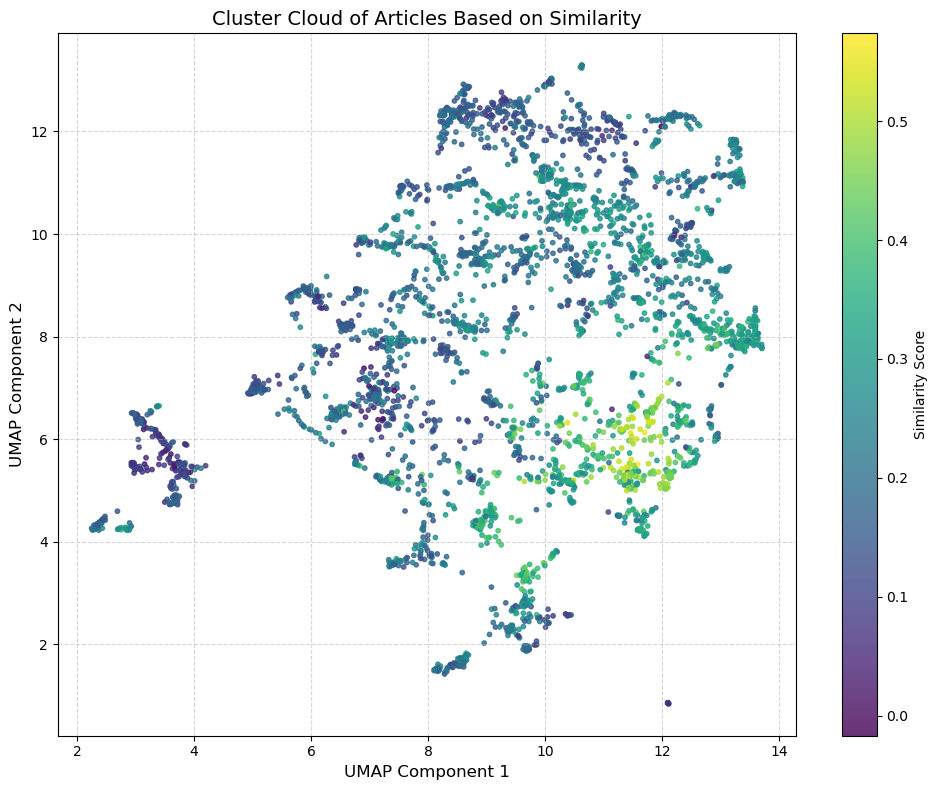

In [106]:
# import umap  # Import the UMAP library for dimensionality reduction
# import numpy as np  # Import NumPy for numerical operations
# import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# # Reduce embeddings to 2D using UMAP
# # UMAP is used to reduce the high-dimensional embeddings into 2D for visualization
# reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine', random_state=42)
# embedding_2d = reducer.fit_transform(embeddings)  # Perform the dimensionality reduction

# # Create a scatter plot with similarity scores as colors
# plt.figure(figsize=(10, 8))  # Set the figure size for the plot
# scatter = plt.scatter(
#     embedding_2d[:, 0],  # Use the first UMAP component for the x-axis
#     embedding_2d[:, 1],  # Use the second UMAP component for the y-axis
#     c=electric_cars_similarities,  # Color the points based on similarity scores
#     cmap="viridis",  # Use the 'viridis' colormap for coloring
#     s=10,  # Set the size of the points
#     alpha=0.8  # Set the transparency of the points
# )

# # Add a color bar to indicate similarity scores
# plt.colorbar(scatter, label="Similarity Score")  # Add a color bar with a label

# # Add title and axis labels to the plot
# plt.title("Cluster Cloud of Articles Based on Similarity", fontsize=14)  # Set the plot title
# plt.xlabel("UMAP Component 1", fontsize=12)  # Label for the x-axis
# plt.ylabel("UMAP Component 2", fontsize=12)  # Label for the y-axis

# # Add grid lines to the plot for better readability
# plt.grid(True, linestyle="--", alpha=0.5)  # Add a grid with dashed lines and some transparency

# # Adjust the layout to ensure everything fits well
# plt.tight_layout()

# # Show the plot
# plt.show()  # Display the scatter plot

In [ ]:

# # Save the sorted DataFrame with similarity scores to a CSV file
# output_path = r"E:\Nieuw dataset\sorted_ev_articles_with_similarity.csv"
# sorted_articles.to_csv(output_path, index=False, encoding='utf-8')
# print(f"Sorted articles with similarity scores saved to: {output_path}")

In [ ]:
# # Load the sorted DataFrame from the specified path
# sorted_df = pd.read_csv(r"E:\Nieuw dataset\sorted_ev_articles.csv") 

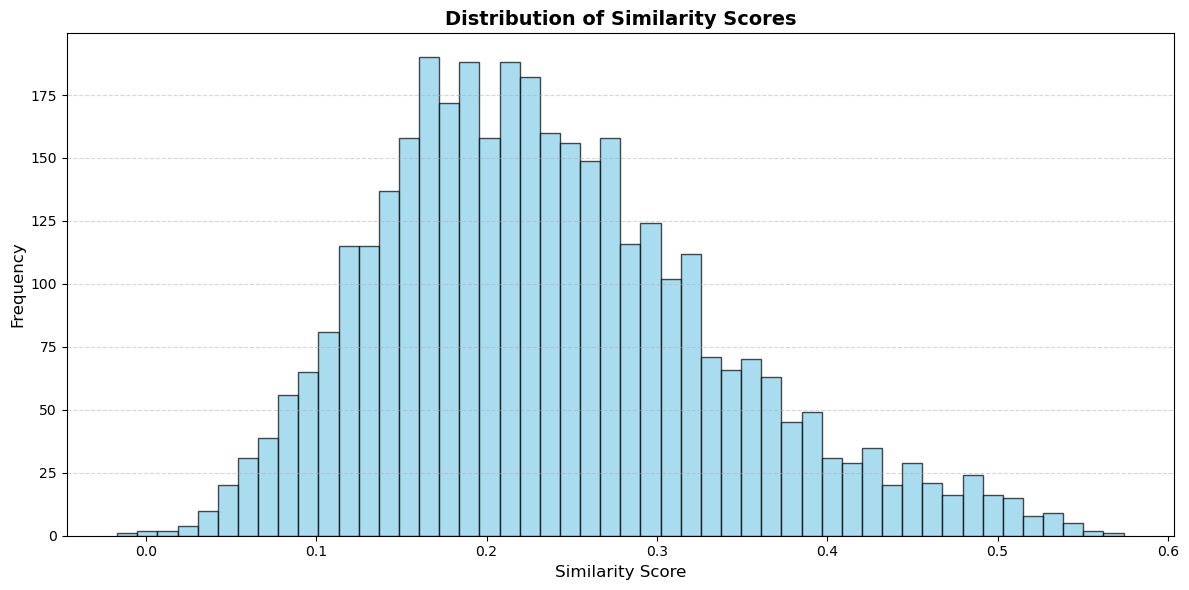

In [107]:
# import matplotlib.pyplot as plt

# # Plot similarity scores
# plt.figure(figsize=(12, 6))
# plt.hist(electric_cars_similarities, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
# plt.title("Distribution of Similarity Scores", fontsize=14, fontweight="bold")
# plt.xlabel("Similarity Score", fontsize=12)
# plt.ylabel("Frequency", fontsize=12)
# plt.grid(axis='y', linestyle="--", alpha=0.5)
# plt.tight_layout()

# # Show the plot
# plt.show()

> print actual articles

In [61]:
# # Display the top 10 most relevant articles
# print("Top 10 articles about electric cars:")
# for idx, row in sorted_articles.head(100).iterrows():
#     print(f"\nArticle {idx} similarity: {row['similarity']:.4f}")
#     print(f"Title: {row['title']}")
#     print(f"Description: {row['description']}")
#     print(f"Content (snippet): {row['content'][:200]}...")
#     print(f"URL: {row['url']}")
#     # Print the related keywords for each article
#     print(f"Related Keywords: {', '.join([kw for kw in ev_keywords if kw.lower() in row['combined_text'].lower()])}")


Top 10 articles about electric cars:

Article 11308 similarity: 0.5739
Title: Zuinige auto's met subsidie gewild over de grens
Description: Door de financiële voordelen bij aanschaf zijn ze goed tweedehands te verkopen aan andere landen.
Content (snippet): Zuinige auto's met subsidie gewild over de grens Veel elektrische auto's die zijn aangeschaft met subsidie, worden verkocht aan het buitenland. Daardoor wordt het lastiger om in Nederland de doelstell...
URL: https://nos.nl/artikel/2028957-zuinige-auto-s-met-subsidie-gewild-over-de-grens
Related Keywords: elektrische auto, tweedehands elektrische auto

Article 82024 similarity: 0.5600
Title: Meer geld voor elektrische laadpunten
Description: Het kabinet hoopt het elektrisch rijden aantrekkelijker te maken. De markt ervoor groeit amper.  
Content (snippet): Meer geld voor elektrische laadpunten Het kabinet trekt voor de komende twee jaar nog eens 1,5 miljoen euro uit voor laadpunten voor elektrische auto's. Eerder was er al 5,7 miljoe

In [101]:
# # Calculate the average similarity score for the top 10 articles
# top_10_articles = sorted_articles.head(10)
# average_similarity_top_10 = top_10_articles['similarity'].mean()

# # Print the titles and similarity scores of the top 10 articles
# print("Top 10 Articles with Average Similarity:")
# for idx, row in top_10_articles.iterrows():
#     print(f"Title: {row['title']}")
#     print(f"Similarity Score: {row['similarity']:.4f}")
#     print(f"URL: {row['url']}\n")

# # Print the average similarity score
# print(f"Average Similarity Score of Top 10 Articles: {average_similarity_top_10:.4f}")

Top 10 Articles with Average Similarity:
Title: Verkoop nieuwe auto's stevent af op laagterecord
Similarity Score: 0.2949
URL: https://nos.nl/artikel/2011357-verkoop-nieuwe-auto-s-stevent-af-op-laagterecord

Title: De stroom 02/01
Similarity Score: 0.2051
URL: https://nos.nl/op3/liveblog/2011449-de-stroom-02-01

Title: Wind en hitte bedreigen bosbrandgebied Australië
Similarity Score: 0.1441
URL: https://nos.nl/artikel/2011782-wind-en-hitte-bedreigen-bosbrandgebied-australie

Title: Hoe gegijzelden buiten schot bleven in Parijs
Similarity Score: 0.0852
URL: https://nos.nl/artikel/2012612-hoe-gegijzelden-buiten-schot-bleven-in-parijs

Title: Stroomstoring Rotterdam automatisch opgelost
Similarity Score: 0.2403
URL: https://nos.nl/artikel/2012942-stroomstoring-rotterdam-automatisch-opgelost

Title: Wetenschappers waarschuwen voor kunstmatige intelligentie
Similarity Score: 0.2201
URL: https://nos.nl/op3/artikel/2012979-wetenschappers-waarschuwen-voor-kunstmatige-intelligentie

Title: Str

Gemiddeld aantal EV-gerelateerde artikelen per maand: 27.39


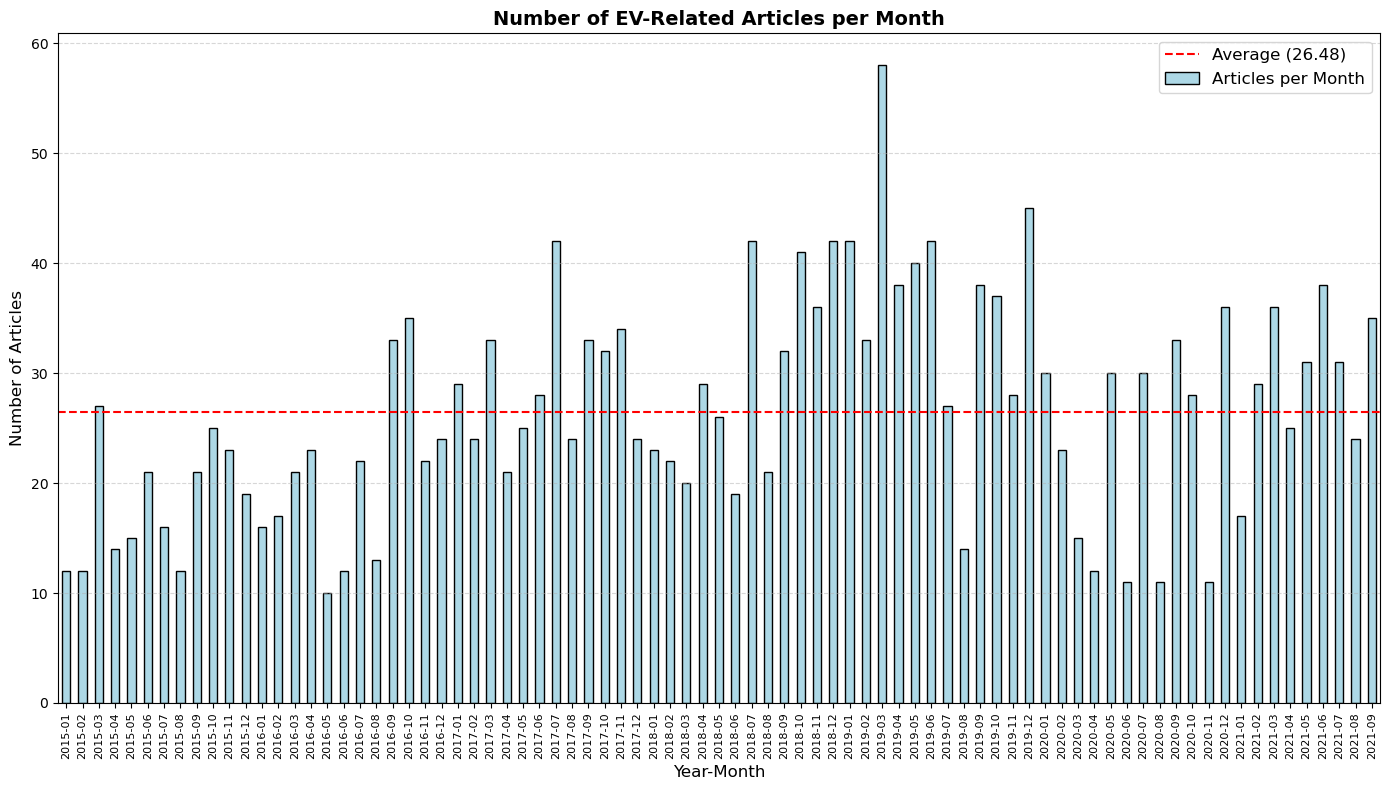

Totaal aantal artikelen: 2145


In [64]:
# # Gemiddeld per maand
# average_ev_articles_per_month = ev_articles_per_year.sum() / (len(ev_articles_per_year) * 12)
# print(f"Gemiddeld aantal EV-gerelateerde artikelen per maand: {average_ev_articles_per_month:.2f}")

# # Ensure 'published_time' is in datetime format
# sorted_df['published_time'] = pd.to_datetime(sorted_df['published_time'], errors='coerce')

# # Extract year and month from 'published_time'
# sorted_df['year_month'] = sorted_df['published_time'].dt.to_period('M')

# # Count the number of articles per month
# articles_per_month = sorted_df['year_month'].value_counts().sort_index()

# # Calculate the average number of articles per month
# average_articles_per_month = articles_per_month.mean()

# # Plot the data
# plt.figure(figsize=(14, 8))
# articles_per_month.plot(kind='bar', color='lightblue', edgecolor='black', label="Articles per Month")

# # Add a horizontal line for the average
# plt.axhline(y=average_articles_per_month, color='red', linestyle='--', label=f"Average ({average_articles_per_month:.2f})")

# # Add labels, title, and formatting
# plt.title("Number of EV-Related Articles per Month", fontsize=14, fontweight="bold")
# plt.xlabel("Year-Month", fontsize=12)
# plt.ylabel("Number of Articles", fontsize=12)
# plt.xticks(rotation=90, fontsize=8)
# plt.yticks(fontsize=10)
# plt.grid(axis='y', linestyle="--", alpha=0.5)
# plt.legend(fontsize=12)
# plt.tight_layout()

# # Show the plot
# plt.show()
# # Print the total number of articles
# total_articles = len(sorted_df)
# print(f"Totaal aantal artikelen: {total_articles}")


Top 10 Articles with Average Similarity:
Title: Zuinige auto's met subsidie gewild over de grens
Similarity Score: 0.5739
URL: https://nos.nl/artikel/2028957-zuinige-auto-s-met-subsidie-gewild-over-de-grens

Title: Meer geld voor elektrische laadpunten
Similarity Score: 0.5600
URL: https://nos.nl/artikel/2146892-meer-geld-voor-elektrische-laadpunten

Title: Infographic: slaan we straks groene energie op in onze auto's?
Similarity Score: 0.5509
URL: https://nos.nl/op3/artikel/2197513-infographic-slaan-we-straks-groene-energie-op-in-onze-auto-s

Title: Nederlandse elektrische auto ook in Duitsland aan de paal
Similarity Score: 0.5475
URL: https://nos.nl/artikel/2144267-nederlandse-elektrische-auto-ook-in-duitsland-aan-de-paal

Title: Nederland koploper groei volledig elektrische auto's
Similarity Score: 0.5473
URL: https://nos.nl/artikel/2214845-nederland-koploper-groei-volledig-elektrische-auto-s

Title: Aantal stekkerauto's is verdubbeld
Similarity Score: 0.5436
URL: https://nos.nl/art

In [68]:
# # Get the top 10 articles with the lowest similarity scores
# top_10_lowest_similarity = sorted_articles.nsmallest(100, 'similarity')

# # Print the details of the top 10 lowest similarity articles
# print("Top 10 Articles with the Lowest Similarity Scores:")
# for idx, row in top_10_lowest_similarity.iterrows():
#     print(f"\nArticle {idx} similarity: {row['similarity']:.4f}")
#     print(f"Title: {row['title']}")
#     print(f"Description: {row['description']}")
#     print(f"Content (snippet): {row['content'][:200]}...")
#     print(f"URL: {row['url']}")


Top 10 Articles with the Lowest Similarity Scores:

Article 195822 similarity: -0.0168
Title: Horeca-ondernemer voor de rechter: 'Thuis meer risico op besmetting'
Description: In een kort geding eisen zeker 68 horecaondernemers onmiddellijke heropening van de horeca. De rechter doet vanmiddag uitspraak. 
Content (snippet): Horeca-ondernemer voor de rechter: 'Thuis meer risico op besmetting' De rechtbank in Den Haag doet vanmiddag om 16.00 uur uitspraak in het door meerdere horecaondernemers aangespannen kort geding. De ...
URL: https://nos.nl/artikel/2353064-horeca-ondernemer-voor-de-rechter-thuis-meer-risico-op-besmetting

Article 232125 similarity: 0.0036
Title: Onderduikershol op de Veluwe na 78 jaar gevonden
Description: De 83-jarige Jits van Straten zat daar als 5-jarige jongen ondergedoken in de Tweede Wereldoorlog. Hij was bij de opgravingen.
Content (snippet): Onderduikershol op de Veluwe na 78 jaar gevonden Bij archeologische opgravingen op de Veluwe is waarschijnlijk een onde

c:\Users\dylan\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\dylan\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


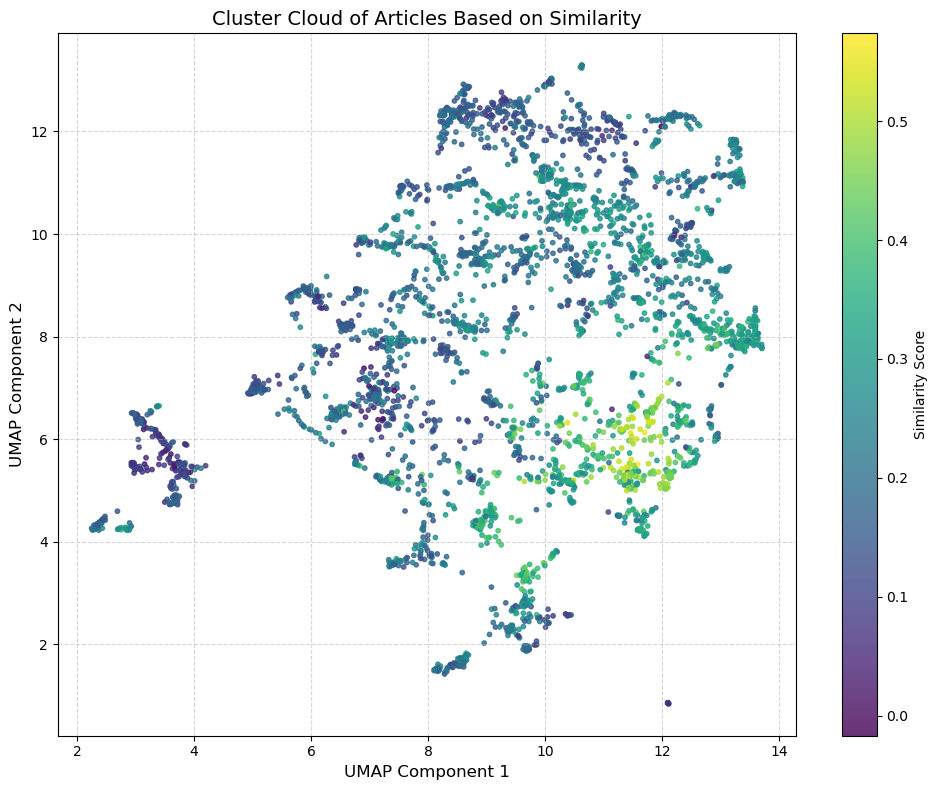

De bovenstaande visualisatie toont een 2D-projectie van alle nieuwsartikelen over elektrische voertuigen, waarbij de positionering is gebaseerd op tekstuele overeenkomst tussen artikelen (via embeddings + cosine similarity). De kleuren representeren de similarity score t.o.v. de EV-query: hoe groener/geel, hoe relevanter het artikel is voor elektrische voertuigen.

Clusters vormen inhoudelijke thema’s – Artikelen die inhoudelijk sterk op elkaar lijken (bijvoorbeeld subsidies of laadpalen) liggen dicht bij elkaar.

Groen/gele zones zijn het meest relevant – Deze bevatten waarschijnlijk goed passende artikelen voor EV-analyse.

Paarse/blauwe gebieden zijn minder gerelateerd – Dit kan wijzen op ruis of bredere maatschappelijke thema’s met zwakke link naar EV's.

## Sentiment analysis

### robbert-v2-dutch-sentiment

In [ ]:
from transformers import pipeline
import pandas as pd


# Laad de sentiment-analyse pipeline (werkt direct)
pipe = pipeline("text-classification", model="DTAI-KULeuven/robbert-v2-dutch-sentiment")


In [ ]:
ev_sentiment = sorted_df.copy()

# Sentimentfunctie die alle scores teruggeeft
def predict_sentiment_full(text):
    results = pipe(text, truncation=True)
    scores = {res['label']: res['score'] for res in results}
    best_label = max(scores, key=scores.get)
    return best_label, scores.get('positive', 0), scores.get('neutral', 0), scores.get('negative', 0)

# Pas sentiment toe op alle rijen
results = ev_sentiment['combined_text'].apply(predict_sentiment_full)

# Voeg kolommen toe
ev_sentiment['sentiment_label'] = results.apply(lambda x: x[0])
ev_sentiment['positive_score'] = results.apply(lambda x: x[1])
ev_sentiment['neutral_score'] = results.apply(lambda x: x[2])
ev_sentiment['negative_score'] = results.apply(lambda x: x[3])
# Apply sentiment analysis with a progress bar
results = []
for text in tqdm(ev_sentiment['combined_text'], desc="Processing Sentiment Analysis"):
    results.append(predict_sentiment(text))

# Convert results to DataFrame columns
ev_sentiment['sentiment_label'] = [res[0] for res in results]
ev_sentiment['sentiment_score'] = [res[1] for res in results]

# Optioneel tonen
from IPython.display import display
display(ev_sentiment[['title', 'url', 'sentiment_label', 'positive_score', 'neutral_score', 'negative_score']])


# Opslaan
ev_sentiment.to_csv("ev_subset_with_sentiment.csv", index=False, encoding="utf-8")

In [74]:
from tqdm import tqdm


# # Laad je dataframe
# df_sorted = pd.read_csv(r"E:\Nieuw dataset\sorted_ev_articles.csv")

# Combineer tekstvelden tot één kolom voor sentimentanalyse
sorted_df['combined_text'] 

# Pak een subset van 25 artikelen
df_subset =sorted_df.copy()

# Functie om sentimentlabel en score te halen via pipeline
def predict_sentiment(text):
    result = pipe(text, truncation=True)[0]
    return result['label'], result['score']

# Pas toe op de subset
results = df_subset['combined_text'].apply(predict_sentiment)
df_subset['sentiment_label'] = results.apply(lambda x: x[0])
df_subset['sentiment_score'] = results.apply(lambda x: x[1])

# Apply sentiment analysis with a progress bar
results = []
for text in tqdm(df_subset['combined_text'], desc="Processing Sentiment Analysis"):
    results.append(predict_sentiment(text))

# Convert results to DataFrame columns
df_subset['sentiment_label'] = [res[0] for res in results]
df_subset['sentiment_score'] = [res[1] for res in results]

# Opslaan
#df_subset.to_csv("ev_subset_with_sentiment.csv", index=False, encoding="utf-8")




display(df_subset[['title', 'url', 'sentiment_label', 'sentiment_score']])



Processing Sentiment Analysis: 100%|██████████| 2145/2145 [16:48<00:00,  2.13it/s]


title  \
0      Zuinige auto's met subsidie gewild over de grens   
1          Tien procent van nieuwe auto's heeft stekker   
2       Plan voor veel meer laadpalen in parkeergarages   
3                    Aantal stekkerauto's is verdubbeld   
4     Infographic: slaan we straks groene energie op...   
...                                                 ...   
2140  Oud, ouder, oudst: dertigers heersen in het to...   
2141  Woede en ongeloof over trage zoektocht na zeer...   
2142  Viroloog Koopmans: kerk op Urk speelt 'Russisc...   
2143  Na bloedbad op boot bij Suriname opnieuw visse...   
2144  Horeca-ondernemer voor de rechter: 'Thuis meer...   

                                                    url sentiment_label  \
0     https://nos.nl/artikel/2028957-zuinige-auto-s-...        Negative   
1     https://nos.nl/artikel/2080280-tien-procent-va...        Positive   
2     https://nos.nl/artikel/2371152-plan-voor-veel-...        Positive   
3     https://nos.nl/artikel/2101496-aantal-stekkera...        Positive   
4     https://nos.nl/op3/artikel/2197513-infographic...        Positive   
...                                                 ...             ...   
2140  https://nos.nl/artikel/2181331-oud-ouder-oudst...        Positive   
2141  https://nos.nl/artikel/2230099-woede-en-ongelo...        Positive   
2142  https://nos.nl/artikel/2373944-viroloog-koopma...        Negative   
2143  https://nos.nl/artikel/2230202-na-bloedbad-op-...        Positive   
2144  https://nos.nl/artikel/2353064-horeca-ondernem...        Positive   

      sentiment_score  
0            0.504026  
1            0.995917  
2            0.998279  
3            0.501588  
4            0.775774  
...               ...  
2140         0.999176  
2141         0.855922  
2142         0.990834  
2143         0.790580  
2144         0.961673  

[2145 rows x 4 columns]

In [ ]:
# Opslaan
df_subset.to_csv("ev_subset_with_sentiment, index=False, encoding="utf-8")

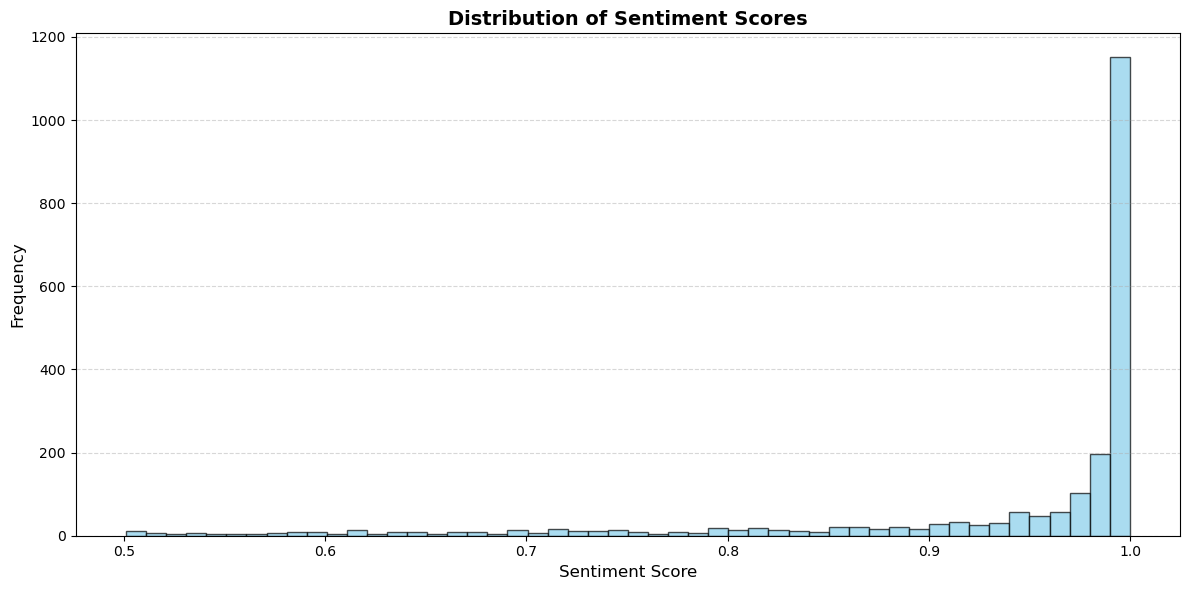

In [79]:
import pandas as pd

import matplotlib.pyplot as plt

# # Load the dataset
# file_path = r"E:\Nieuw dataset\Total_EV_with_sentiment.csv"
# df = pd.read_csv(file_path)

# Ensure sentiment_score column is numeric
#df_subset['sentiment_score'] = pd.to_numeric(downcast=['sentiment_score'], errors='coerce')

# Plot the sentiment scores
plt.figure(figsize=(12, 6))
plt.hist(df_subset['sentiment_score'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Sentiment Scores", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [86]:
# Zorg dat 'published_time' in datetime staat
df_subset['published_time'] = pd.to_datetime(df_subset['published_time'], errors='coerce')

# Maak 'year_month' kolom
df_subset['year_month'] = df_subset['published_time'].dt.to_period('M')

# Verzamel unieke maanden in de dataset
all_months = df_subset['year_month'].dropna().unique()

# Filter rijen met geldige sentiment_score
valid_sentiment = df_subset[df_subset['sentiment_score'].notna()]
months_with_sentiment = valid_sentiment['year_month'].dropna().unique()

# Zoek ontbrekende maanden
missing_months = set(all_months) - set(months_with_sentiment)

# Resultaat tonen
if not missing_months:
    print("✅ Alle maanden in df_subset hebben sentiment scores.")
else:
    print("⚠️ De volgende maanden in df_subset missen sentiment scores:")
    print(sorted(missing_months))



✅ Alle maanden in df_subset hebben sentiment scores.


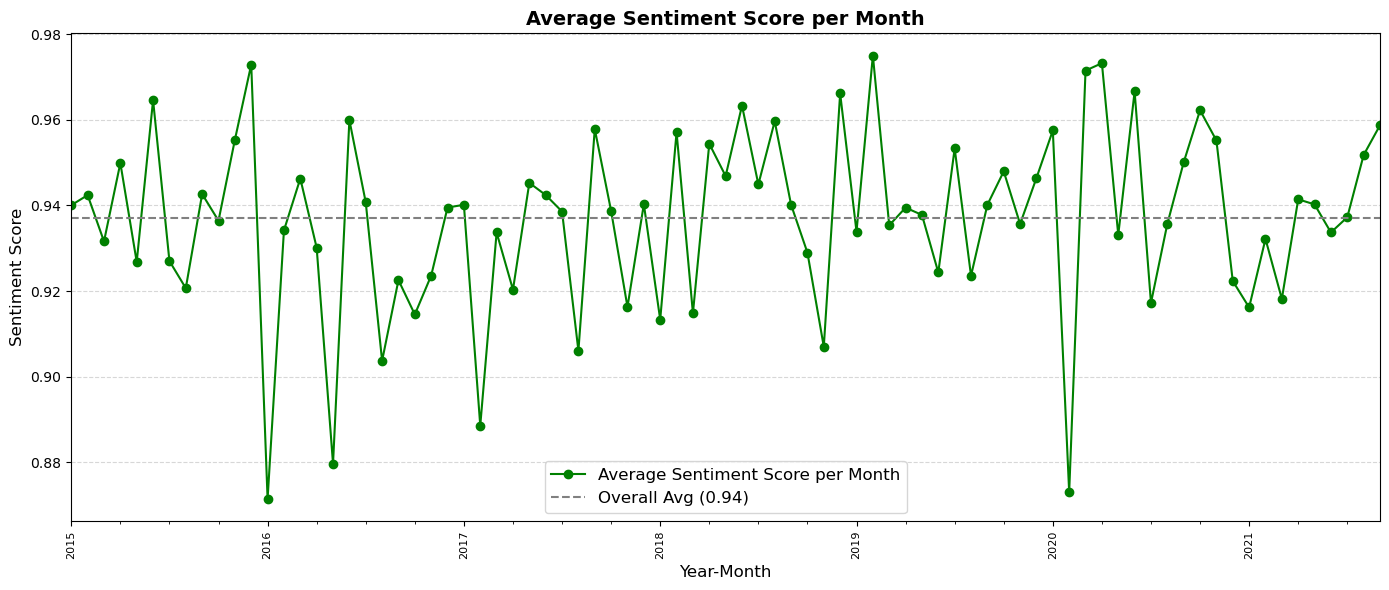

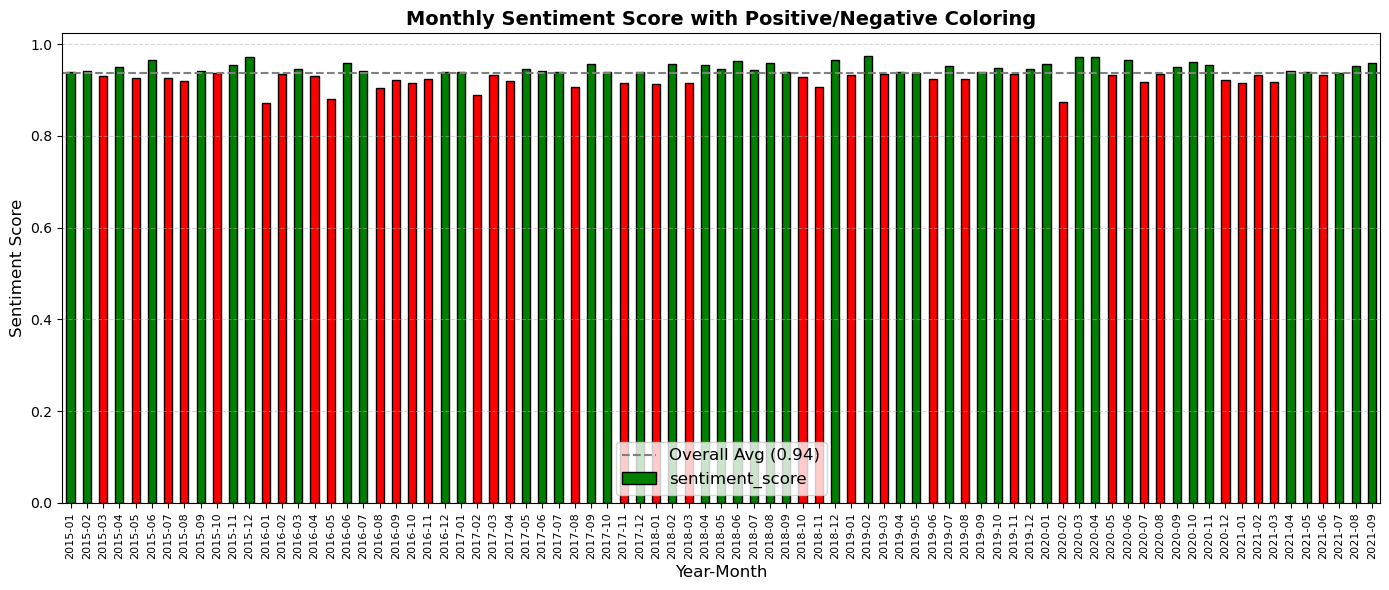

In [89]:
import matplotlib.pyplot as plt

# Controleer of sentiment_score en year_month bestaan
if 'sentiment_score' in df_subset.columns and 'year_month' in df_subset.columns:

    # Bereken gemiddeld sentiment per maand
    monthly_avg = df_subset.groupby('year_month')['sentiment_score'].mean()

    # Bereken overall gemiddelde sentiment
    overall_avg = df_subset['sentiment_score'].mean()

    # ===== Plot 1: Lijnplot met gewogen gemiddelde =====
    plt.figure(figsize=(14, 6))
    monthly_avg.plot(marker='o', linestyle='-', color='green', label='Average Sentiment Score per Month')
    plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Avg ({overall_avg:.2f})')
    plt.title("Average Sentiment Score per Month", fontsize=14, fontweight="bold")
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Sentiment Score", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # ===== Plot 2: Staafdiagram met kleuren =====
    colors = ['green' if score >= overall_avg else 'red' for score in monthly_avg]

    plt.figure(figsize=(14, 6))
    monthly_avg.plot(kind='bar', color=colors, edgecolor='black')
    plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Avg ({overall_avg:.2f})')
    plt.title("Monthly Sentiment Score with Positive/Negative Coloring", fontsize=14, fontweight="bold")
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Sentiment Score", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

else:
    print("Zorg dat de kolommen 'sentiment_score' en 'year_month' aanwezig zijn in df_subset.")



In [91]:
# Zet published_time om naar datetime
df_subset['published_time'] = pd.to_datetime(df_subset['published_time'], errors='coerce')

# Maak een 'year_month' kolom in 'YYYY/MM'-formaat
df_subset['year_month'] = df_subset['published_time'].dt.strftime('%Y/%m')

# Bereken gemiddeld sentiment per maand
avg_sentiment_per_month = (
    df_subset.groupby('year_month')['sentiment_score']
    .mean()
    .reset_index()
)

# Kolommen hernoemen
avg_sentiment_per_month.columns = ['Year-Month', 'Average Sentiment Score']

# Sla op naar CSV
avg_sentiment_per_month.to_csv(
    r"E:\Nieuw dataset\Dutch news articles 2015-2025 NOS.nl\average_sentiment_per_month.csv",
    index=False,
    encoding='utf-8'
)

print("✅ Bestand 'average_sentiment_per_month.csv' succesvol opgeslagen.")


✅ Bestand 'average_sentiment_per_month.csv' succesvol opgeslagen.


## Semtiment analyse 2: 

In [154]:
! pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 640.0 kB/s eta 0:00:01
   ------------------------- ------------- 81.9/126.0 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 925.7 kB/s eta 0:00:00


In [155]:
! pip install vaderSentiment-nl


ERROR: Could not find a version that satisfies the requirement vaderSentiment-nl (from versions: none)
ERROR: No matching distribution found for vaderSentiment-nl


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at pdelobelle/robbert-v2-dutch-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


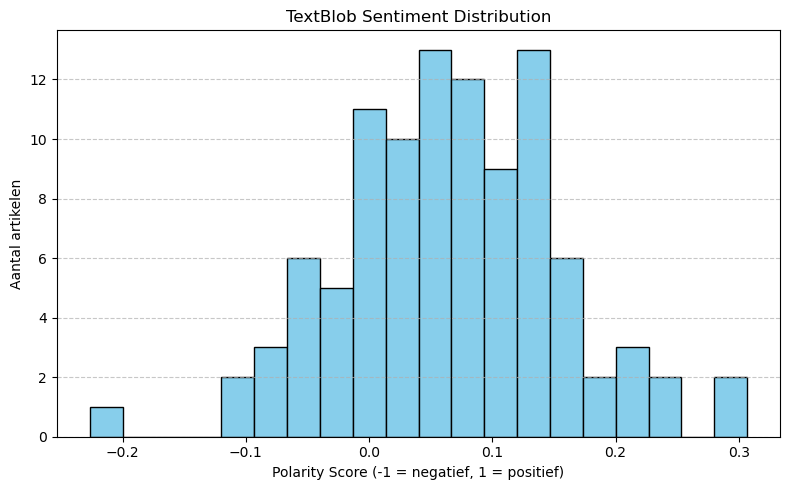

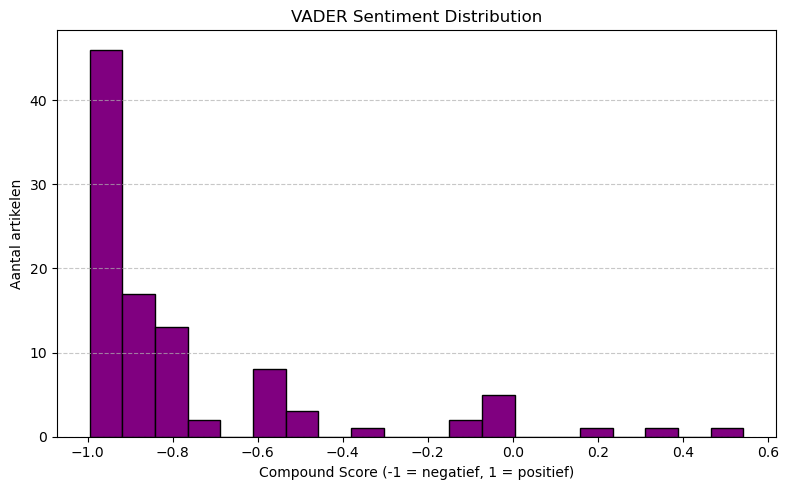

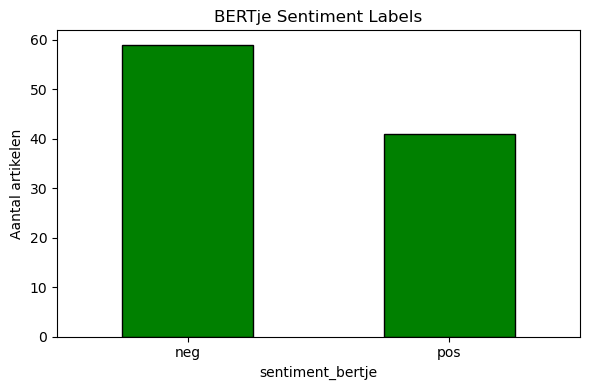

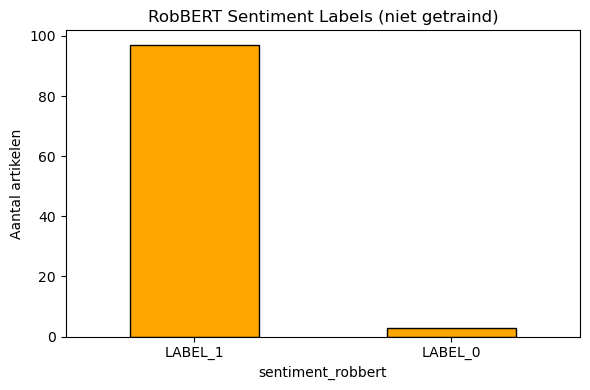

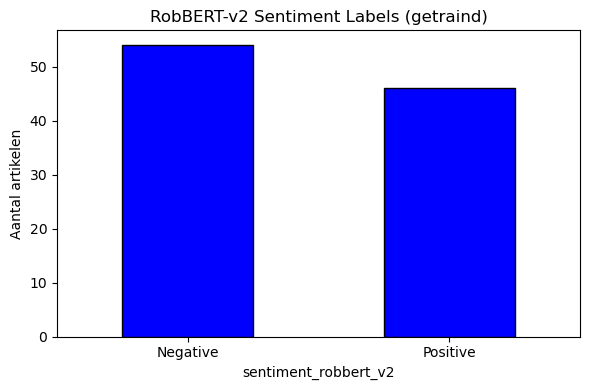

In [246]:
import pandas as pd
from textblob import TextBlob
from textblob_nl import PatternAnalyzer, PatternTagger
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
# === 1. Laad random 100 artikelen ===
df_sentiment_test = pd.read_csv(r"E:\Nieuw dataset\sorted_ev_articles_with_similarity.csv").sample(100, random_state=42)
df_sentiment_test['combined_text'] = df_sentiment_test['combined_text'].fillna("")

# === 2. TextBlob-NL sentiment ===
def textblob_sentiment(text):
    blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    return blob.sentiment[0]

df_sentiment_test['sentiment_textblob'] = df_sentiment_test['combined_text'].apply(textblob_sentiment)

# === 3. BERTje sentiment ===
bertje_pipe = pipeline("text-classification", model="wietsedv/bert-base-dutch-cased-finetuned-sentiment")

def bertje_label(text):
    try:
        return bertje_pipe(text[:512])[0]['label']
    except:
        return "error"

df_sentiment_test['sentiment_bertje'] = df_sentiment_test['combined_text'].apply(bertje_label)

# === 4. RobBERT sentiment (niet getraind op sentiment) ===
robbert_pipe = pipeline("text-classification", model="pdelobelle/robbert-v2-dutch-base")

def robbert_label(text):
    try:
        return robbert_pipe(text[:512])[0]['label']
    except:
        return "error"

df_sentiment_test['sentiment_robbert'] = df_sentiment_test['combined_text'].apply(robbert_label)

# === 5. VADER-NL sentiment ===
vader_analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = vader_analyzer.polarity_scores(text)['compound']
    return score  # tussen -1 (negatief) en 1 (positief)

df_sentiment_test['sentiment_vader'] = df_sentiment_test['combined_text'].apply(vader_sentiment)

# === 6. RobBERT-v2 sentiment (wél getraind op sentiment) ===
robbert_v2_pipe = pipeline("text-classification", model="DTAI-KULeuven/robbert-v2-dutch-sentiment")

def robbert_v2_label(text):
    try:
        return robbert_v2_pipe(text[:512])[0]['label']
    except:
        return "error"

df_sentiment_test['sentiment_robbert_v2'] = df_sentiment_test['combined_text'].apply(robbert_v2_label)


# === 6. Visualisaties ===

# 6a. TextBlob histogram
plt.figure(figsize=(8, 5))
plt.hist(df_sentiment_test['sentiment_textblob'], bins=20, color='skyblue', edgecolor='black')
plt.title("TextBlob Sentiment Distribution")
plt.xlabel("Polarity Score (-1 = negatief, 1 = positief)")
plt.ylabel("Aantal artikelen")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6b. VADER histogram
plt.figure(figsize=(8, 5))
plt.hist(df_sentiment_test['sentiment_vader'], bins=20, color='purple', edgecolor='black')
plt.title("VADER Sentiment Distribution")
plt.xlabel("Compound Score (-1 = negatief, 1 = positief)")
plt.ylabel("Aantal artikelen")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 6c. BERTje labels
plt.figure(figsize=(6, 4))
df_sentiment_test['sentiment_bertje'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title("BERTje Sentiment Labels")
plt.ylabel("Aantal artikelen")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 6d. RobBERT labels
plt.figure(figsize=(6, 4))
df_sentiment_test['sentiment_robbert'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title("RobBERT Sentiment Labels (niet getraind)")
plt.ylabel("Aantal artikelen")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 6e. RobBERT-v2 sentiment labels
plt.figure(figsize=(6, 4))
df_sentiment_test['sentiment_robbert_v2'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title("RobBERT-v2 Sentiment Labels (getraind)")
plt.ylabel("Aantal artikelen")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




## Verder gaan met textblob

In [260]:
df_sentiment = pd.read_csv(r"E:\Nieuw dataset\sorted_ev_articles_with_similarity.csv")
df_sentiment['combined_text'] = df_sentiment['combined_text'].fillna("")



In [261]:
# Print the column names of the DataFrame
print(df_sentiment.columns)

Index(['published_time', 'title', 'description', 'content', 'url', 'channel',
       'combined_text', 'year_month', 'year', 'similarity', 'ev_related'],
      dtype='object')


In [264]:
from textblob import TextBlob
from textblob_nl import PatternAnalyzer, PatternTagger
from tqdm import tqdm

tqdm.pandas()

def textblob_sentiment(text):
    blob = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    return blob.sentiment[0]

# Sentimentanalyse uitvoeren
df_sentiment['sentiment_textblob'] = df_sentiment['combined_text'].progress_apply(textblob_sentiment)

# Kolomnaam wijzigen
df_sentiment.rename(columns={'sentiment_textblob': 'average_sentiment_score_textblob'}, inplace=True)



100%|██████████| 964/964 [00:02<00:00, 447.35it/s]


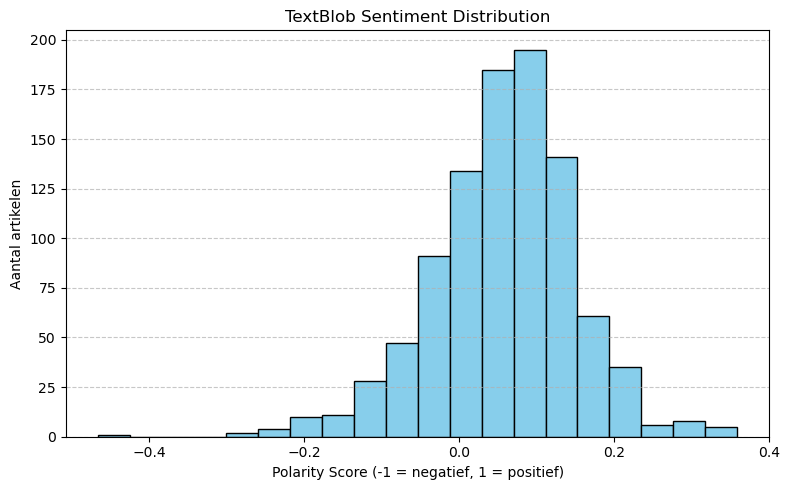

In [265]:
# 6a. TextBlob histogram
plt.figure(figsize=(8, 5))
plt.hist(df_sentiment['average_sentiment_score_textblob'], bins=20, color='skyblue', edgecolor='black')
plt.title("TextBlob Sentiment Distribution")
plt.xlabel("Polarity Score (-1 = negatief, 1 = positief)")
plt.ylabel("Aantal artikelen")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

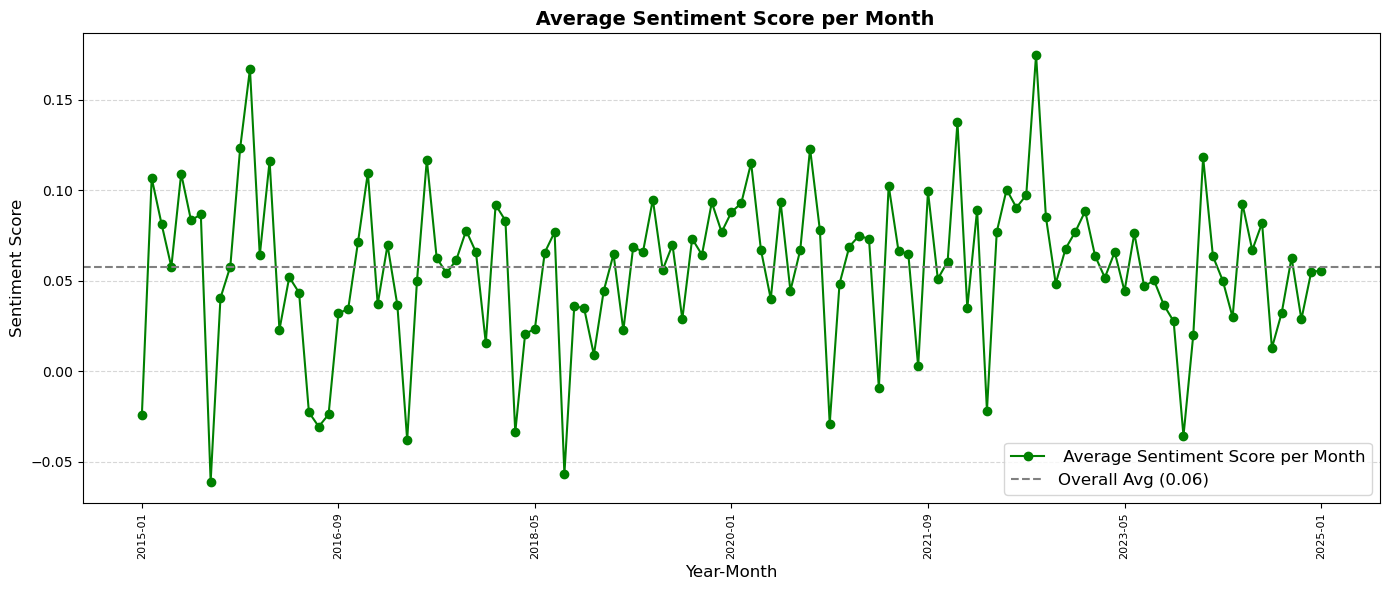

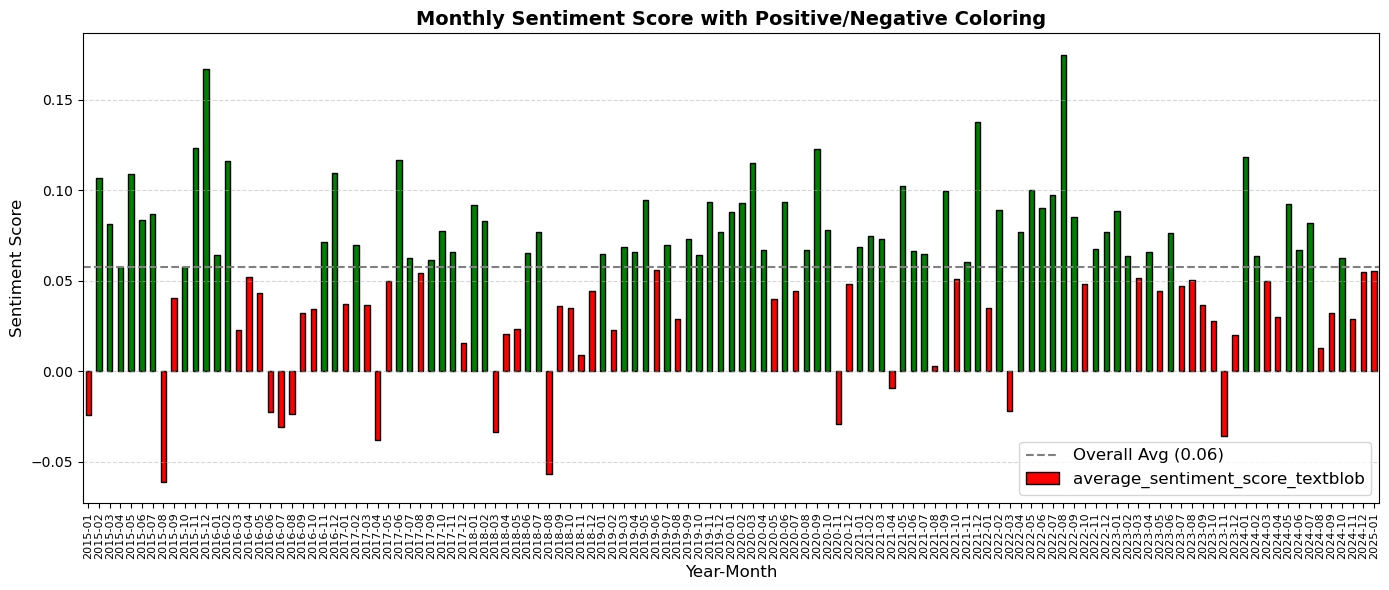

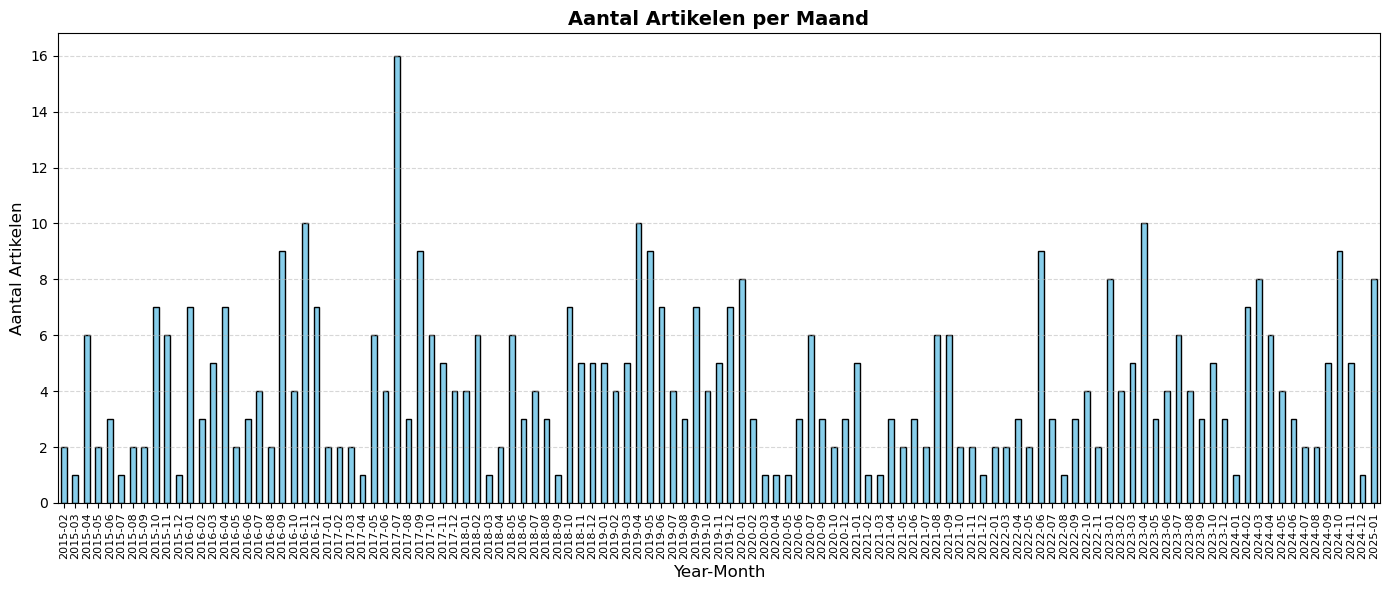

In [266]:
# Controleer of sentiment_score en year_month bestaan
if 'average_sentiment_score_textblob' in df_sentiment.columns and 'year_month' in df_sentiment.columns:


    # Bereken gemiddeld sentiment per maand
    monthly_avg = df_sentiment.groupby('year_month')['average_sentiment_score_textblob'].mean()

    # Bereken overall gemiddelde sentiment
    overall_avg = df_sentiment['average_sentiment_score_textblob'].mean()

    # ===== Plot 1: Lijnplot met gewogen gemiddelde =====
    plt.figure(figsize=(14, 6))
    monthly_avg.plot(marker='o', linestyle='-', color='green', label=' Average Sentiment Score per Month')
    plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Avg ({overall_avg:.2f})')
    plt.title(" Average Sentiment Score per Month", fontsize=14, fontweight="bold")
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Sentiment Score", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # ===== Plot 2: Staafdiagram met kleuren =====
    colors = ['green' if score >= overall_avg else 'red' for score in monthly_avg]

    plt.figure(figsize=(14, 6))
    monthly_avg.plot(kind='bar', color=colors, edgecolor='black')
    plt.axhline(y=overall_avg, color='gray', linestyle='--', label=f'Overall Avg ({overall_avg:.2f})')
    plt.title("Monthly Sentiment Score with Positive/Negative Coloring", fontsize=14, fontweight="bold")
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Sentiment Score", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

       # ===== Plot 3: Aantal artikelen per maand =====
    plt.figure(figsize=(14, 6))
    monthly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Aantal Artikelen per Maand", fontsize=14, fontweight="bold")
    plt.xlabel("Year-Month", fontsize=12)
    plt.ylabel("Aantal Artikelen", fontsize=12)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("Zorg dat de kolommen 'sentiment_score' en 'year_month' aanwezig zijn in df_subset.")



In [256]:
def print_extreme_sentiments_by_score(df, sentiment_column, n=10):
    print("\n=== Top Positive Articles ===")
    positive_articles = df.nlargest(n, sentiment_column)
    for _, row in positive_articles.iterrows():
        print(f"Title: {row['title']}")
        print(f"URL: {row['url']}")
        print(f"Sentiment Score: {row[sentiment_column]:.4f}\n")

    print("\n=== Most Neutral Articles ===")
    neutral_articles = df.iloc[(df[sentiment_column] - 0).abs().argsort()[:n]]
    for _, row in neutral_articles.iterrows():
        print(f"Title: {row['title']}")
        print(f"URL: {row['url']}")
        print(f"Sentiment Score: {row[sentiment_column]:.4f}\n")

    print("\n=== Top Negative Articles ===")
    negative_articles = df.nsmallest(n, sentiment_column)
    for _, row in negative_articles.iterrows():
        print(f"Title: {row['title']}")
        print(f"URL: {row['url']}")
        print(f"Sentiment Score: {row[sentiment_column]:.4f}\n")


In [267]:
print_extreme_sentiments_by_score(df_sentiment, sentiment_column='average_sentiment_score_textblob', n=10)



=== Top Positive Articles ===
Title: Aandeel laadpaalmaker Fastned bij beursgang meteen vijf keer meer waard
URL: https://nos.nl/artikel/2290094-aandeel-laadpaalmaker-fastned-bij-beursgang-meteen-vijf-keer-meer-waard
Sentiment Score: 0.3593

Title: Bijrol voor Frijns en De Vries bij Formule E in Marrakesh
URL: https://nos.nl/artikel/2325154-bijrol-voor-frijns-en-de-vries-bij-formule-e-in-marrakesh
Sentiment Score: 0.3556

Title: Formule E gaat ook racen zonder coureurs
URL: https://nos.nl/op3/artikel/2071793-formule-e-gaat-ook-racen-zonder-coureurs
Sentiment Score: 0.3363

Title: 'Nederland het best voorbereid op zelfrijdende auto's'
URL: https://nos.nl/artikel/2212347-nederland-het-best-voorbereid-op-zelfrijdende-auto-s
Sentiment Score: 0.3274

Title: Tesla bouwt eerste Europese 'gigafabriek' in Duitsland
URL: https://nos.nl/artikel/2310204-tesla-bouwt-eerste-europese-gigafabriek-in-duitsland
Sentiment Score: 0.3252

Title: Nederlandse zonnewagen Stella wint 'Oscar' in Silicon Valley

In [271]:
# Zet published_time om naar datetime
df_sentiment['published_time'] = pd.to_datetime(df_sentiment['published_time'], errors='coerce')

# Maak een 'year_month' kolom in 'YYYY/MM'-formaat
df_sentiment['year_month'] = df_sentiment['published_time'].dt.strftime('%Y/%m')

# Bereken gemiddeld sentiment per maand
avg_sentiment_per_month = (
    df_sentiment.groupby('year_month')['average_sentiment_score_textblob']
    .mean()
    .reset_index()
)

# Kolommen hernoemen
avg_sentiment_per_month.columns = ['Year-Month', 'Average average_sentiment_score_textblob Score']

# Sla op naar CSV
avg_sentiment_per_month.to_csv(
    r"E:\Nieuw dataset\Dutch news articles 2015-2025 NOS.nl\average_sentiment_per_month.csv",
    index=False,
    encoding='utf-8'
)

print("Bestand 'average_sentiment_per_month.csv' succesvol opgeslagen.")


Bestand 'average_sentiment_per_month.csv' succesvol opgeslagen.


In [272]:
print(avg_sentiment_per_month.columns)
display(avg_sentiment_per_month)

Index(['Year-Month', 'Average average_sentiment_score_textblob Score'], dtype='object')


Year-Month  Average average_sentiment_score_textblob Score
0      2015/01                                       -0.024206
1      2015/02                                        0.106743
2      2015/03                                        0.081516
3      2015/04                                        0.057695
4      2015/05                                        0.109200
..         ...                                             ...
116    2024/09                                        0.032398
117    2024/10                                        0.062800
118    2024/11                                        0.028742
119    2024/12                                        0.054899
120    2025/01                                        0.055679

[121 rows x 2 columns]